## Feature selction

### 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
plt.rc("font", family="Malgun Gothic") # 시각화 할때 한글이 볼수 있게 하겠다
plt.rc("axes", unicode_minus=False) # 마이너스 부호가 보일수 있게 하겠다
# pd.options.display.max_columns = None
df = pd.read_csv('../main/수명주기붙힌거공백제거v3.csv',encoding="cp949")
# df['회생기업2'] = df['회생기업2'].fillna(0)
# df['회생기업1'] = df['회생기업1'].fillna(0)
# df['회생기업2'] = df['회생기업2'].fillna(0)
# df['회계년도'] = pd.to_datetime(df['회계년도'], format='%d-%b').dt.strftime('20%d-%m')
# df['재고자산회전율'] = df['재고자산회전율'].fillna(0)
# df['매입채무회전율'] = df['매입채무회전율'].fillna(0)
# df['매출채권_대_매입채무비율'] = df['매출채권_대_매입채무비율'].fillna(0)
df = df.sort_values(by='회계년도')
df = df.reset_index(drop=True)
df

,회사명,거래소코드,회계년도,이자보상배율,총자산증가율,유형자산증가율,유동자산증가율,자기자본증가율,매출액증가율,매출액총이익율,...,매출원가감소율여부,배당금감소율여부,변화율여부,직원감소율여부,자본증가율여부,투자활동감소율여부,기업수명주기,통계청한국표준산업분류10차(세세분류),회생기업1,회생기업2
0,(주)CMG제약,58820,201112,3.53,1.98,-5.90,17.64,-2.02,56.40,41.83,...,1,0,0,0,0,0,1,의약품제조업,0,0
1,(주)디아크,78590,201112,10.43,13.04,1.71,35.94,29.14,47.52,14.36,...,0,0,0,0,0,0,4,그외자동차용신품부품제조업,0,0
2,(주)옵트론텍,82210,201112,2.39,3.11,0.01,4.78,21.79,-6.84,21.81,...,0,0,0,0,0,1,3,사진장비및광학기기제조업,0,0
3,상신이디피(주),91580,201112,6.82,11.97,19.54,3.13,20.61,37.83,14.77,...,0,0,0,0,0,0,2,축전지제조업,0,0
4,(주)오픈베이스,49480,201112,4.26,1.83,-0.28,4.69,3.74,38.02,22.83,...,0,0,0,0,0,0,2,컴퓨터시스템통합자문및구축서비스업,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8743,(주)에스에이엠티,31330,201912,14.78,-11.14,-7.71,-20.47,11.28,3.22,4.21,...,0,0,0,0,0,0,3,수송용운송장비도매업,0,1
8744,에스디엔(주),99220,201912,1.17,15.14,29.09,23.35,13.58,6.79,26.67,...,0,0,0,0,0,1,2,수송용운송장비도매업,0,0
8745,(주)에스에이티,60540,201912,11.61,9.86,-0.54,17.31,9.02,4.65,16.69,...,0,0,0,0,0,0,2,기기용자동측정및제어장치제조업,0,1
8746,(주)에스비에스,34120,201912,1.97,30.29,2.62,45.27,13.83,-10.54,19.61,...,0,1,0,0,0,0,5,지상파방송업,0,1


In [2]:
# df.to_csv('레이블합친최종본.csv',encoding='cp949',index=False)

In [3]:
# df.isna().sum()

### 3년 으로 나누기

In [4]:
df = df.sort_values(by='회계년도')
df = df.reset_index(drop=True)
df_2011 = df.loc[:2651]
df_2012 = df.loc[862:3596]
df_2012 = df_2012.reset_index(drop=True)
df_2013 = df.loc[1742:4590]
df_2013 = df_2013.reset_index(drop=True)
df_2014 = df.loc[2652:5610]
df_2014 = df_2014.reset_index(drop=True)
df_2015 = df.loc[3597:6656]
df_2015 = df_2015.reset_index(drop=True)
df_2016 = df.loc[4591:7702]
df_2016 = df_2016.reset_index(drop=True)
df_2017 = df.loc[5611:]
df_2017 = df_2017.reset_index(drop=True)

### 결측치 확인

In [5]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# plt.rc("font", family="Malgun Gothic") # 시각화 할때 한글이 볼수 있게 하겠다
# plt.rc("axes", unicode_minus=False)
# plt.figure(figsize=(30,25))

# sns.heatmap(df.isna())

### 아직 결정된건 아니지만 일단 남은 결측치 평균으로 채워넣고 남는 결측치는 제거한다

In [6]:
# means = lambda x: x.fillna(x.mean())
# df = df.groupby('회사명').apply(means)
# df = df.dropna()
# df = df.reset_index(drop=True)
# df.isna().sum()

In [7]:
# df.info()

In [8]:
# df.columns

### 아상치 확인

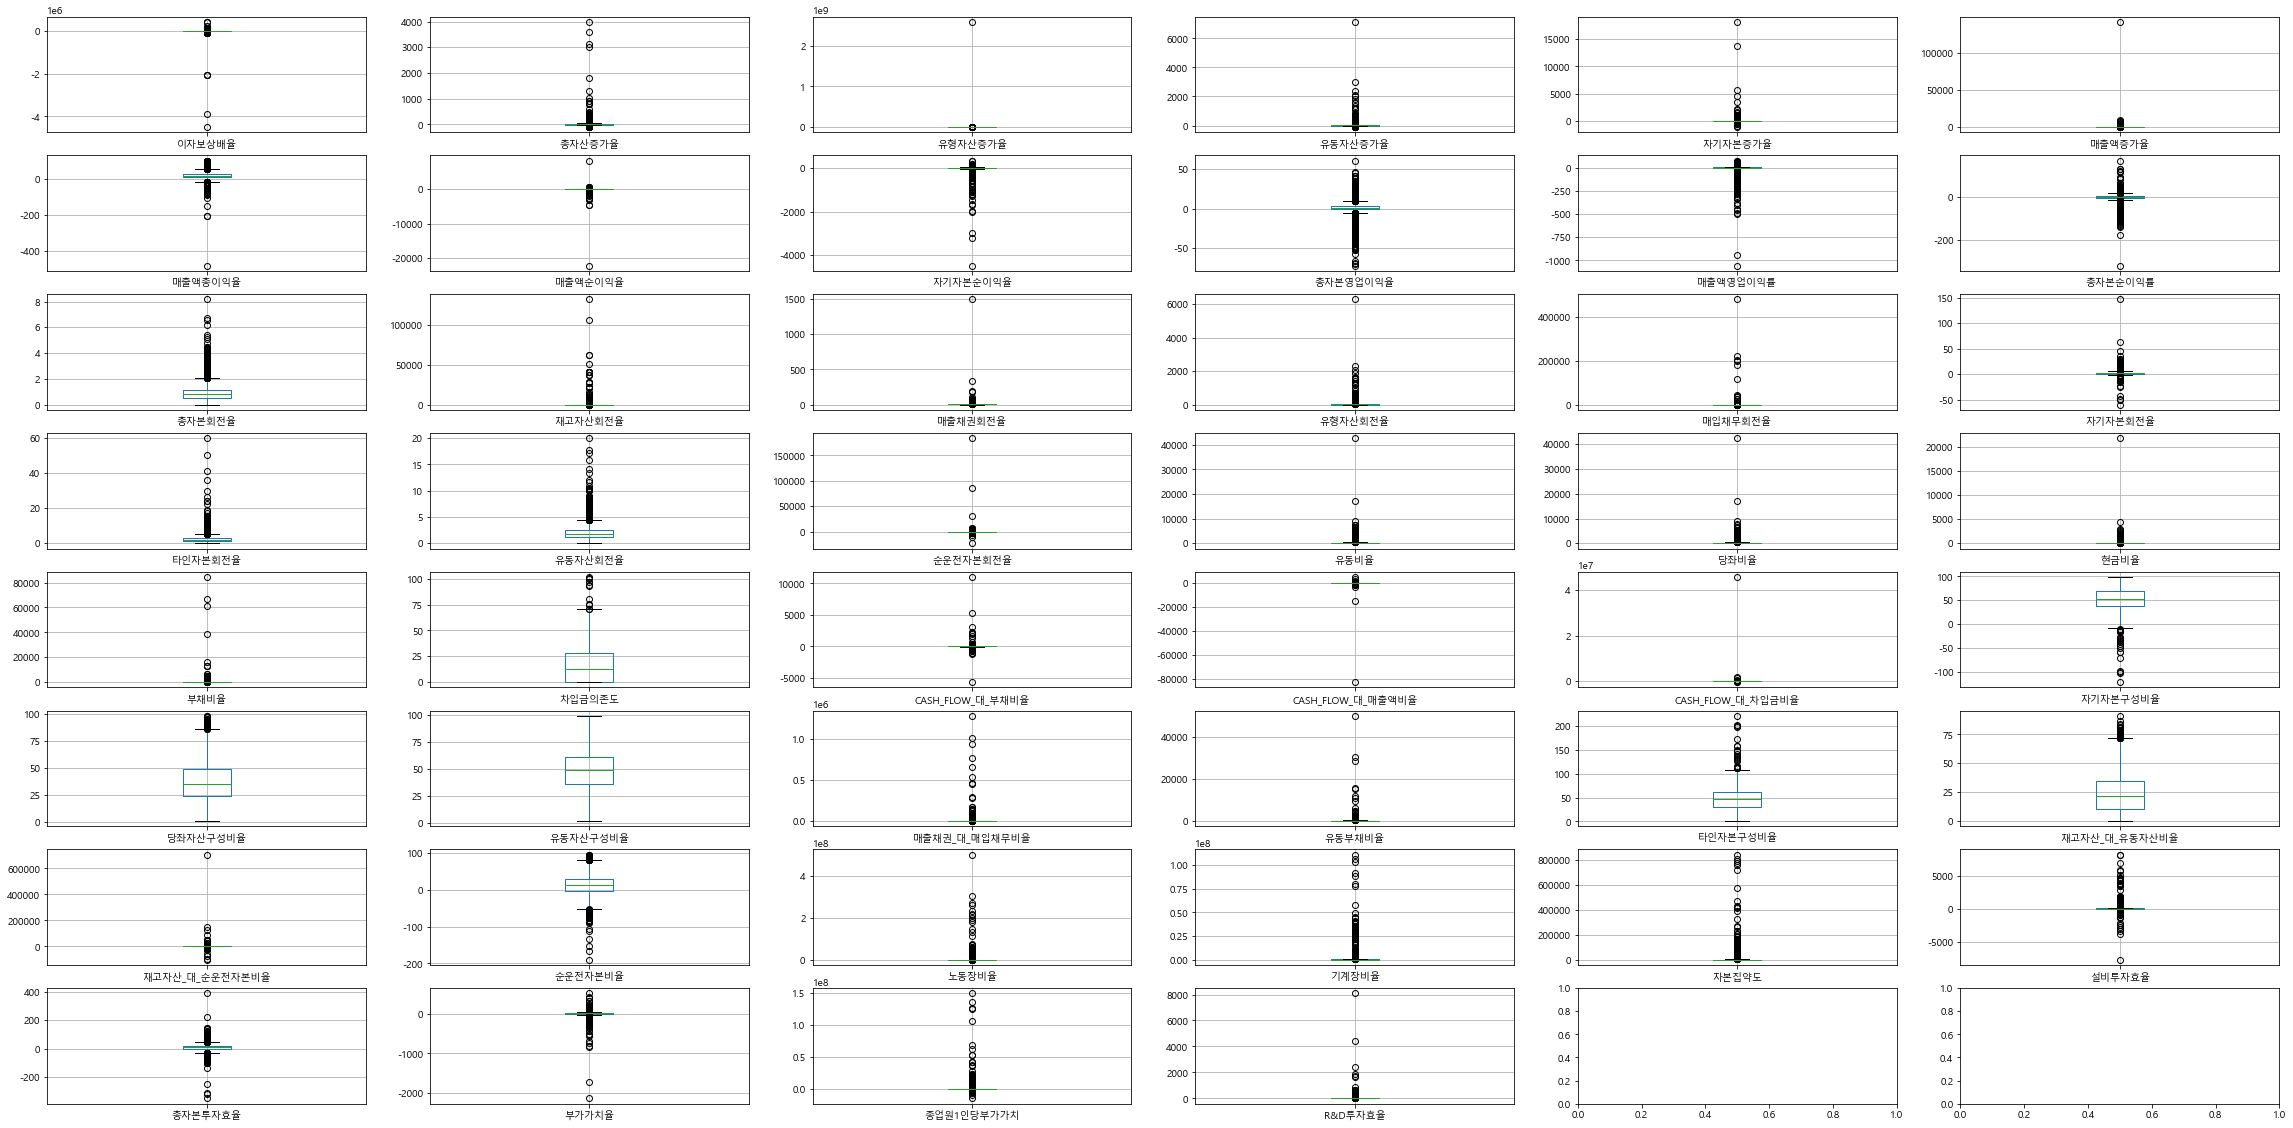

In [9]:
from matplotlib.pyplot import imread

fig, axes = plt.subplots(8, 6)
fig.set_size_inches((40,20))

df.boxplot(column='이자보상배율', ax=axes[0,0])
df.boxplot(column='총자산증가율', ax=axes[0,1])
df.boxplot(column='유형자산증가율', ax=axes[0,2])
df.boxplot(column='유동자산증가율', ax=axes[0,3])
df.boxplot(column='자기자본증가율', ax=axes[0,4])
df.boxplot(column='매출액증가율', ax=axes[0,5])
df.boxplot(column='매출액총이익율', ax=axes[1,0])
df.boxplot(column='매출액순이익율', ax=axes[1,1])
df.boxplot(column='자기자본순이익율', ax=axes[1,2])
df.boxplot(column='총자본영업이익율', ax=axes[1,3])
df.boxplot(column='매출액영업이익률', ax=axes[1,4])
df.boxplot(column='총자본순이익률', ax=axes[1,5])
df.boxplot(column='총자본회전율', ax=axes[2,0])
df.boxplot(column='재고자산회전율', ax=axes[2,1])
df.boxplot(column='매출채권회전율', ax=axes[2,2])
df.boxplot(column='유형자산회전율', ax=axes[2,3])
df.boxplot(column='매입채무회전율', ax=axes[2,4])
df.boxplot(column='자기자본회전율', ax=axes[2,5])
df.boxplot(column='타인자본회전율', ax=axes[3,0])
df.boxplot(column='유동자산회전율', ax=axes[3,1])
df.boxplot(column='순운전자본회전율', ax=axes[3,2])
df.boxplot(column='유동비율', ax=axes[3,3])
df.boxplot(column='당좌비율', ax=axes[3,4])
df.boxplot(column='현금비율', ax=axes[3,5])
df.boxplot(column='부채비율', ax=axes[4,0])
df.boxplot(column='차입금의존도', ax=axes[4,1])
df.boxplot(column='CASH_FLOW_대_부채비율', ax=axes[4,2])
df.boxplot(column='CASH_FLOW_대_매출액비율', ax=axes[4,3])
df.boxplot(column='CASH_FLOW_대_차입금비율', ax=axes[4,4])
df.boxplot(column='자기자본구성비율', ax=axes[4,5])
df.boxplot(column='당좌자산구성비율', ax=axes[5,0])
df.boxplot(column='유동자산구성비율', ax=axes[5,1])
df.boxplot(column='매출채권_대_매입채무비율', ax=axes[5,2])
df.boxplot(column='유동부채비율', ax=axes[5,3])
df.boxplot(column='타인자본구성비율', ax=axes[5,4])
df.boxplot(column='재고자산_대_유동자산비율', ax=axes[5,5])
df.boxplot(column='재고자산_대_순운전자본비율', ax=axes[6,0])
df.boxplot(column='순운전자본비율', ax=axes[6,1])
df.boxplot(column='노동장비율', ax=axes[6,2])
df.boxplot(column='기계장비율', ax=axes[6,3])
df.boxplot(column='자본집약도', ax=axes[6,4])
df.boxplot(column='설비투자효율', ax=axes[6,5])
df.boxplot(column='총자본투자효율', ax=axes[7,0])
df.boxplot(column='부가가치율', ax=axes[7,1])
df.boxplot(column='종업원1인당부가가치', ax=axes[7,2])
df.boxplot(column='R&D투자효율', ax=axes[7,3])

plt.show()

In [10]:
# df.columns

### 이상치 조정

In [11]:
from scipy.stats.mstats import winsorize
df1 = df.copy()
for col in df1.columns:
     df1[col] = winsorize(df1[col], limits= 0.025)

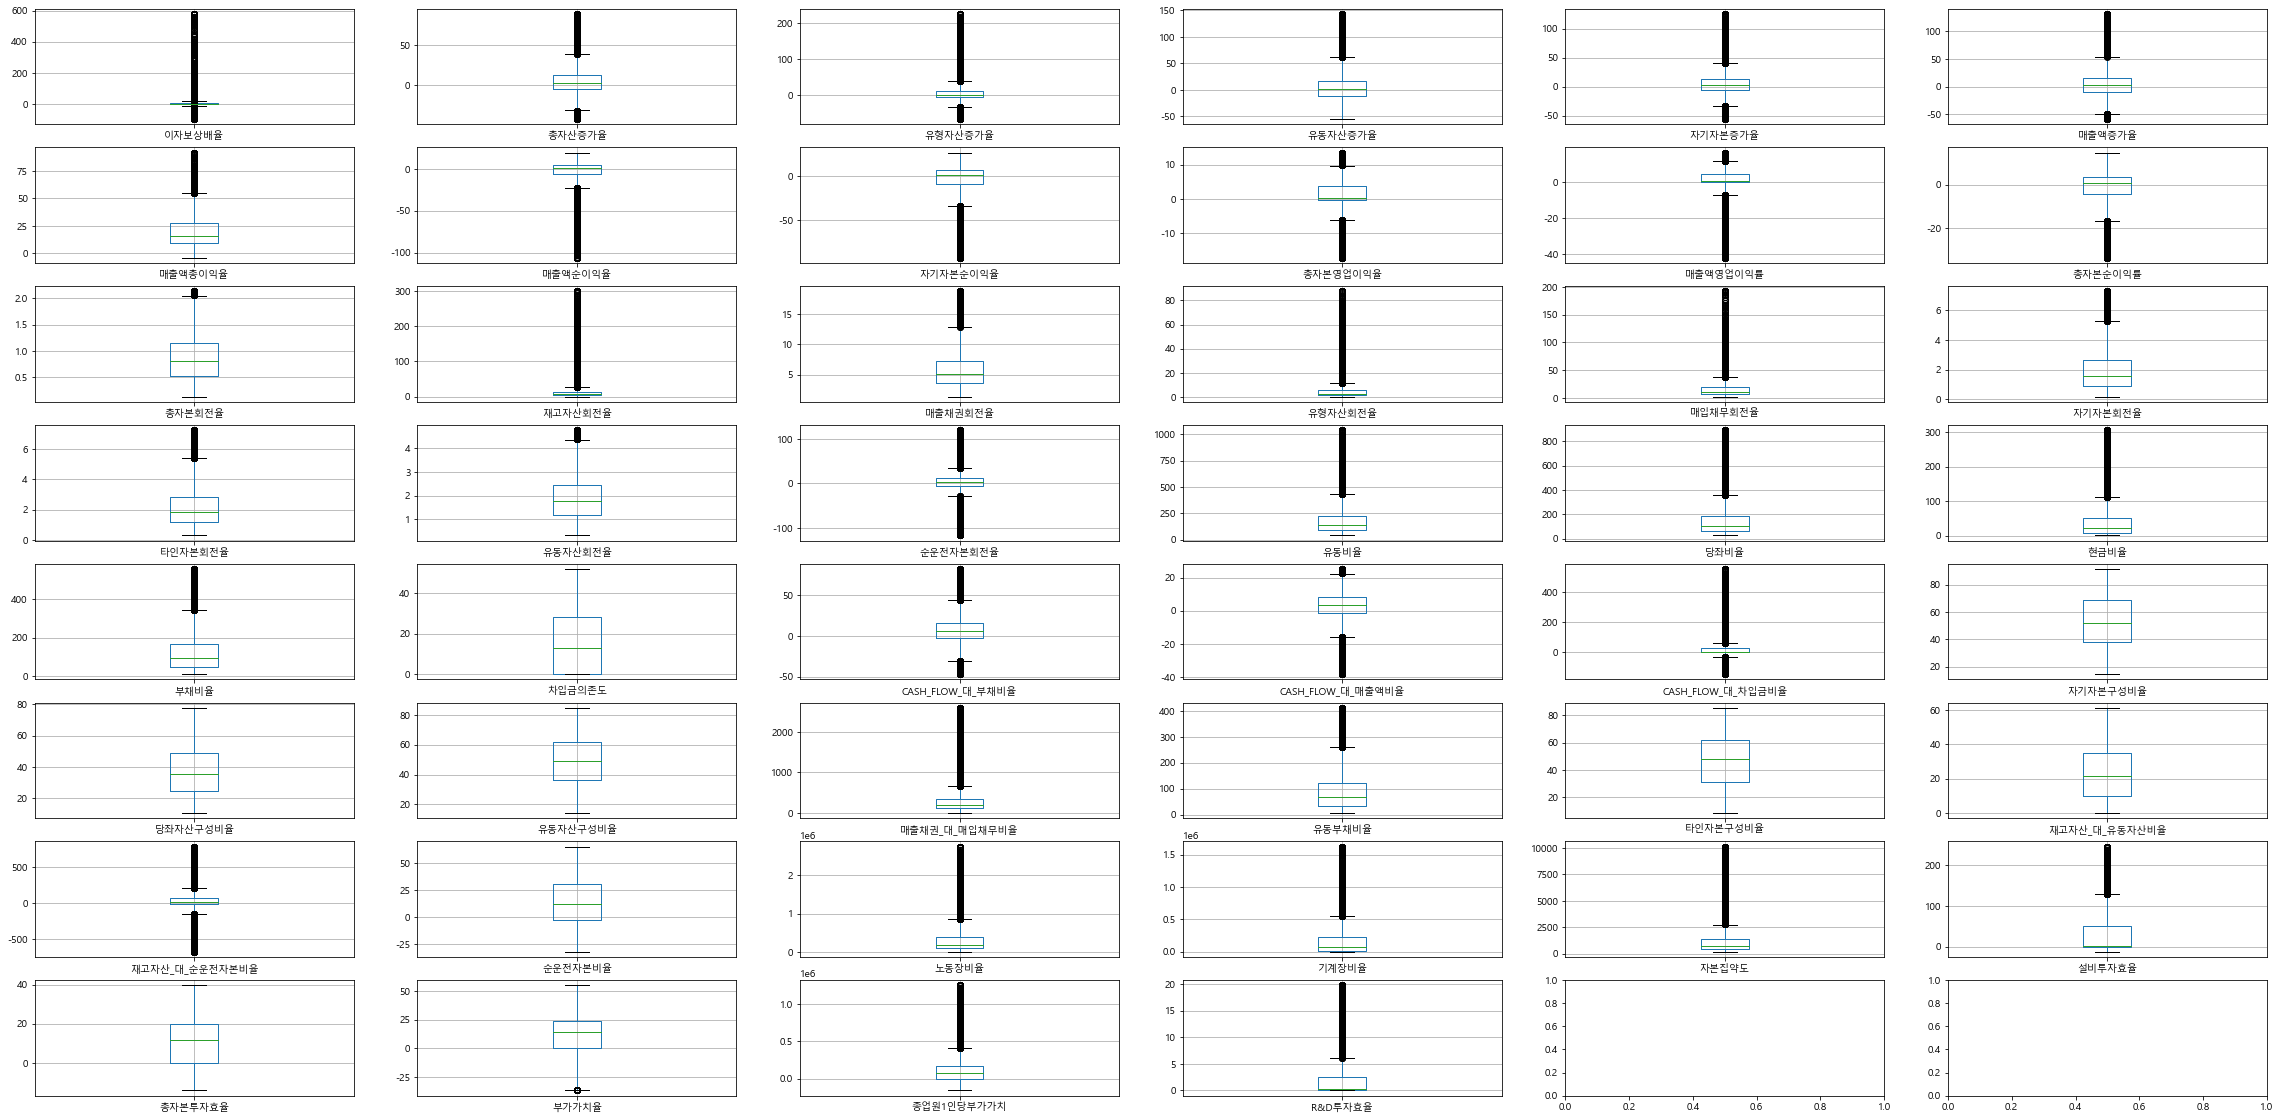

In [12]:
from matplotlib.pyplot import imread

fig, axes = plt.subplots(8, 6)
fig.set_size_inches((40,20))

df1.boxplot(column='이자보상배율', ax=axes[0,0])
df1.boxplot(column='총자산증가율', ax=axes[0,1])
df1.boxplot(column='유형자산증가율', ax=axes[0,2])
df1.boxplot(column='유동자산증가율', ax=axes[0,3])
df1.boxplot(column='자기자본증가율', ax=axes[0,4])
df1.boxplot(column='매출액증가율', ax=axes[0,5])
df1.boxplot(column='매출액총이익율', ax=axes[1,0])
df1.boxplot(column='매출액순이익율', ax=axes[1,1])
df1.boxplot(column='자기자본순이익율', ax=axes[1,2])
df1.boxplot(column='총자본영업이익율', ax=axes[1,3])
df1.boxplot(column='매출액영업이익률', ax=axes[1,4])
df1.boxplot(column='총자본순이익률', ax=axes[1,5])
df1.boxplot(column='총자본회전율', ax=axes[2,0])
df1.boxplot(column='재고자산회전율', ax=axes[2,1])
df1.boxplot(column='매출채권회전율', ax=axes[2,2])
df1.boxplot(column='유형자산회전율', ax=axes[2,3])
df1.boxplot(column='매입채무회전율', ax=axes[2,4])
df1.boxplot(column='자기자본회전율', ax=axes[2,5])
df1.boxplot(column='타인자본회전율', ax=axes[3,0])
df1.boxplot(column='유동자산회전율', ax=axes[3,1])
df1.boxplot(column='순운전자본회전율', ax=axes[3,2])
df1.boxplot(column='유동비율', ax=axes[3,3])
df1.boxplot(column='당좌비율', ax=axes[3,4])
df1.boxplot(column='현금비율', ax=axes[3,5])
df1.boxplot(column='부채비율', ax=axes[4,0])
df1.boxplot(column='차입금의존도', ax=axes[4,1])
df1.boxplot(column='CASH_FLOW_대_부채비율', ax=axes[4,2])
df1.boxplot(column='CASH_FLOW_대_매출액비율', ax=axes[4,3])
df1.boxplot(column='CASH_FLOW_대_차입금비율', ax=axes[4,4])
df1.boxplot(column='자기자본구성비율', ax=axes[4,5])
df1.boxplot(column='당좌자산구성비율', ax=axes[5,0])
df1.boxplot(column='유동자산구성비율', ax=axes[5,1])
df1.boxplot(column='매출채권_대_매입채무비율', ax=axes[5,2])
df1.boxplot(column='유동부채비율', ax=axes[5,3])
df1.boxplot(column='타인자본구성비율', ax=axes[5,4])
df1.boxplot(column='재고자산_대_유동자산비율', ax=axes[5,5])
df1.boxplot(column='재고자산_대_순운전자본비율', ax=axes[6,0])
df1.boxplot(column='순운전자본비율', ax=axes[6,1])
df1.boxplot(column='노동장비율', ax=axes[6,2])
df1.boxplot(column='기계장비율', ax=axes[6,3])
df1.boxplot(column='자본집약도', ax=axes[6,4])
df1.boxplot(column='설비투자효율', ax=axes[6,5])
df1.boxplot(column='총자본투자효율', ax=axes[7,0])
df1.boxplot(column='부가가치율', ax=axes[7,1])
df1.boxplot(column='종업원1인당부가가치', ax=axes[7,2])
df1.boxplot(column='R&D투자효율', ax=axes[7,3])

plt.show()

In [13]:
# # 정규성 qqplot
# # 표준정규분포에서 직선에 가까우면 오차의 정규성 만족
# from matplotlib.pyplot import imread
# import scipy.stats as stats

# fig, axes = plt.subplots(10,5)
# fig.set_size_inches((40,20))

# stats.probplot(df1['이자보상배율'],dist=stats.norm,plot=axes[0,0])
# axes[0,0].title.set_text("이자보상배율")
# stats.probplot(df1['총자산증가율'],dist=stats.norm,plot=axes[0,1])
# axes[0,1].title.set_text("총자산증가율")
# stats.probplot(df1['유형자산증가율'],dist=stats.norm,plot=axes[0,2])
# axes[0,2].title.set_text("유형자산증가율")
# stats.probplot(df1['유동자산증가율'],dist=stats.norm,plot=axes[0,3])
# axes[0,3].title.set_text("유동자산증가율")
# stats.probplot(df1['자기자본증가율'],dist=stats.norm,plot=axes[0,4])
# axes[0,4].title.set_text("자기자본증가율")
# stats.probplot(df1['매출액증가율'],dist=stats.norm,plot=axes[1,0])
# axes[0,0].title.set_text("매출액증가율")
# stats.probplot(df1['매출액총이익율'],dist=stats.norm,plot=axes[1,1])
# axes[1,1].title.set_text("매출액총이익율")
# stats.probplot(df1['매출액순이익율'],dist=stats.norm,plot=axes[1,2])
# axes[1,2].title.set_text("매출액순이익율")
# stats.probplot(df1['자기자본순이익율'],dist=stats.norm,plot=axes[1,3])
# axes[1,3].title.set_text("자기자본순이익율")
# stats.probplot(df1['총자본영업이익율'],dist=stats.norm,plot=axes[1,4])
# axes[1,4].title.set_text("총자본영업이익율")
# stats.probplot(df1['매출액영업이익률'],dist=stats.norm,plot=axes[2,0])
# axes[2,0].title.set_text("매출액영업이익률")
# stats.probplot(df1['총자본순이익률'],dist=stats.norm,plot=axes[2,1])
# axes[2,1].title.set_text("총자본순이익률")
# stats.probplot(df1['총자본회전율'],dist=stats.norm,plot=axes[2,2])
# axes[2,2].title.set_text("총자본회전율")
# stats.probplot(df1['재고자산회전율'],dist=stats.norm,plot=axes[2,3])
# axes[2,3].title.set_text("재고자산회전율")
# stats.probplot(df1['매출채권회전율'],dist=stats.norm,plot=axes[2,4])
# axes[2,4].title.set_text("매출채권회전율")
# stats.probplot(df1['유형자산회전율'],dist=stats.norm,plot=axes[3,0])
# axes[3,0].title.set_text("유형자산회전율")
# stats.probplot(df1['매입채무회전율'],dist=stats.norm,plot=axes[3,1])
# axes[3,1].title.set_text("매입채무회전율")
# stats.probplot(df1['자기자본회전율'],dist=stats.norm,plot=axes[3,2])
# axes[3,2].title.set_text("자기자본회전율")
# stats.probplot(df1['타인자본회전율'],dist=stats.norm,plot=axes[3,3])
# axes[3,3].title.set_text("타인자본회전율")
# stats.probplot(df1['유동자산회전율'],dist=stats.norm,plot=axes[3,4])
# axes[3,4].title.set_text("유동자산회전율")
# stats.probplot(df1['순운전자본회전율'],dist=stats.norm,plot=axes[4,0])
# axes[4,0].title.set_text("순운전자본회전율")
# stats.probplot(df1['유동비율'],dist=stats.norm,plot=axes[4,1])
# axes[4,1].title.set_text("유동비율")
# stats.probplot(df1['당좌비율'],dist=stats.norm,plot=axes[4,2])
# axes[4,2].title.set_text("당좌비율")
# stats.probplot(df1['현금비율'],dist=stats.norm,plot=axes[4,3])
# axes[4,3].title.set_text("현금비율")
# stats.probplot(df1['부채비율'],dist=stats.norm,plot=axes[4,4])
# axes[4,4].title.set_text("부채비율")
# stats.probplot(df1['차입금의존도'],dist=stats.norm,plot=axes[5,0])
# axes[5,0].title.set_text("차입금의존도")
# stats.probplot(df1['CASH_FLOW_대_부채비율'],dist=stats.norm,plot=axes[5,1])
# axes[5,1].title.set_text("CASH_FLOW_대_부채비율")
# stats.probplot(df1['CASH_FLOW_대_매출액비율'],dist=stats.norm,plot=axes[5,2])
# axes[5,2].title.set_text("CASH_FLOW_대_매출액비율")
# stats.probplot(df1['CASH_FLOW_대_차입금비율'],dist=stats.norm,plot=axes[5,3])
# axes[5,3].title.set_text("CASH_FLOW_대_차입금비율")
# stats.probplot(df1['자기자본구성비율'],dist=stats.norm,plot=axes[5,4])
# axes[5,4].title.set_text("자기자본구성비율")
# stats.probplot(df1['당좌자산구성비율'],dist=stats.norm,plot=axes[6,0])
# axes[6,0].title.set_text("당좌자산구성비율")
# stats.probplot(df1['유동자산구성비율'],dist=stats.norm,plot=axes[6,1])
# axes[6,1].title.set_text("유동자산구성비율")
# stats.probplot(df1['매출채권_대_매입채무비율'],dist=stats.norm,plot=axes[6,2])
# axes[6,2].title.set_text("매출채권_대_매입채무비율")
# stats.probplot(df1['유동부채비율'],dist=stats.norm,plot=axes[6,3])
# axes[6,3].title.set_text("유동부채비율")
# stats.probplot(df1['타인자본구성비율'],dist=stats.norm,plot=axes[6,4])
# axes[6,4].title.set_text("타인자본구성비율")
# stats.probplot(df1['재고자산_대_유동자산비율'],dist=stats.norm,plot=axes[7,0])
# axes[7,0].title.set_text("재고자산_대_유동자산비율")
# stats.probplot(df1['재고자산_대_순운전자본비율'],dist=stats.norm,plot=axes[7,1])
# axes[7,1].title.set_text("재고자산_대_순운전자본비율")
# stats.probplot(df1['순운전자본비율'],dist=stats.norm,plot=axes[7,2])
# axes[7,2].title.set_text("순운전자본비율")
# stats.probplot(df1['노동장비율'],dist=stats.norm,plot=axes[7,3])
# axes[7,3].title.set_text("노동장비율")
# stats.probplot(df1['기계장비율'],dist=stats.norm,plot=axes[7,4])
# axes[7,4].title.set_text("기계장비율")
# stats.probplot(df1['자본집약도'],dist=stats.norm,plot=axes[8,0])
# axes[8,0].title.set_text("자본집약도")
# stats.probplot(df1['설비투자효율'],dist=stats.norm,plot=axes[8,1])
# axes[8,1].title.set_text("설비투자효율")
# stats.probplot(df1['총자본투자효율'],dist=stats.norm,plot=axes[8,2])
# axes[8,2].title.set_text("총자본투자효율")
# stats.probplot(df1['부가가치율'],dist=stats.norm,plot=axes[8,3])
# axes[8,3].title.set_text("부가가치율")
# stats.probplot(df1['종업원1인당부가가치'],dist=stats.norm,plot=axes[8,4])
# axes[8,4].title.set_text("종업원1인당부가가치")
# stats.probplot(df1['R & D 투자효율'],dist=stats.norm,plot=axes[9,0])
# axes[9,0].title.set_text("R & D 투자효율")

# plt.show()

In [14]:
df.columns

Index(['회사명', '거래소코드', '회계년도', '이자보상배율', '총자산증가율', '유형자산증가율', '유동자산증가율',
       '자기자본증가율', '매출액증가율', '매출액총이익율', '매출액순이익율', '자기자본순이익율', '총자본영업이익율',
       '매출액영업이익률', '총자본순이익률', '총자본회전율', '재고자산회전율', '매출채권회전율', '유형자산회전율',
       '매입채무회전율', '자기자본회전율', '타인자본회전율', '유동자산회전율', '순운전자본회전율', '유동비율', '당좌비율',
       '현금비율', '부채비율', '차입금의존도', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율',
       'CASH_FLOW_대_차입금비율', '자기자본구성비율', '당좌자산구성비율', '유동자산구성비율',
       '매출채권_대_매입채무비율', '유동부채비율', '타인자본구성비율', '재고자산_대_유동자산비율',
       '재고자산_대_순운전자본비율', '순운전자본비율', '노동장비율', '기계장비율', '자본집약도', '설비투자효율',
       '총자본투자효율', '부가가치율', '종업원1인당부가가치', 'R&D투자효율', '매출원가감소율여부', '배당금감소율여부',
       '변화율여부', '직원감소율여부', '자본증가율여부', '투자활동감소율여부', '기업수명주기',
       '통계청한국표준산업분류10차(세세분류)', '회생기업1', '회생기업2'],
      dtype='object')

In [15]:
# x = df[['총자산증가율', '유형자산증가율', '유동자산증가율',
#        '자기자본증가율', '매출액증가율', '매출액총이익율', '매출액순이익율', '자기자본순이익율', '총자본영업이익율',
#        '매출액영업이익률', '총자본순이익률', '총자본회전율', '재고자산회전율', '매출채권회전율', '유형자산회전율',
#        '매입채무회전율', '자기자본회전율', '타인자본회전율', '유동자산회전율', '순운전자본회전율', '유동비율', '당좌비율',
#        '현금비율', '부채비율', '차입금의존도', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율',
#        'CASH_FLOW_대_차입금비율', '자기자본구성비율', '당좌자산구성비율', '유동자산구성비율',
#        '매출채권_대_매입채무비율', '유동부채비율', '타인자본구성비율', '재고자산_대_유동자산비율',
#        '재고자산_대_순운전자본비율', '순운전자본비율', '노동장비율', '기계장비율', '자본집약도', '설비투자효율',
#        '총자본투자효율', '부가가치율', '종업원1인당부가가치', 'R&D투자효율']]
# y = df['회생기업2']

In [61]:
x = df[['총자산증가율', '유형자산증가율', '유동자산증가율',
       '자기자본증가율', '매출액증가율', '매출액총이익율', '매출액순이익율', '자기자본순이익율', '총자본영업이익율',
       '매출액영업이익률', '총자본순이익률', '총자본회전율', '재고자산회전율', '매출채권회전율', '유형자산회전율',
       '매입채무회전율', '자기자본회전율', '타인자본회전율', '유동자산회전율', '순운전자본회전율', '유동비율', '당좌비율',
       '현금비율', '부채비율', '차입금의존도', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율',
       'CASH_FLOW_대_차입금비율', '자기자본구성비율', '당좌자산구성비율', '유동자산구성비율',
       '매출채권_대_매입채무비율', '유동부채비율', '타인자본구성비율', '재고자산_대_유동자산비율',
       '재고자산_대_순운전자본비율', '순운전자본비율', '노동장비율', '기계장비율', '자본집약도', '설비투자효율',
       '총자본투자효율', '부가가치율', '종업원1인당부가가치', 'R&D투자효율']]
y = df['회생기업2']

### 정규화 하고 정규성 보기

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
SS = StandardScaler()
RS = RobustScaler()
MIN = MinMaxScaler()
ss_sc = SS.fit_transform(x)
# ss_sc_iqr = SS.fit_transform(df)
ss_sc2 = pd.DataFrame(ss_sc)
# ss_sc_iqr = pd.DataFrame(ss_sc_iqr)
rs_sc = RS.fit_transform(x)
# rs_sc_iqr = RS.fit_transform(df)
rs_sc2 = pd.DataFrame(rs_sc)
# rs_sc_iqr2 = pd.DataFrame(rs_sc_iqr)
mi_sc = MIN.fit_transform(x)
mi_sc2 = pd.DataFrame(mi_sc)

In [63]:
ss_sc2.columns = ['총자산증가율', '유형자산증가율', '유동자산증가율',
       '자기자본증가율', '매출액증가율', '매출액총이익율', '매출액순이익율', '자기자본순이익율', '총자본영업이익율',
       '매출액영업이익률', '총자본순이익률', '총자본회전율', '재고자산회전율', '매출채권회전율', '유형자산회전율',
       '매입채무회전율', '자기자본회전율', '타인자본회전율', '유동자산회전율', '순운전자본회전율', '유동비율', '당좌비율',
       '현금비율', '부채비율', '차입금의존도', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율',
       'CASH_FLOW_대_차입금비율', '자기자본구성비율', '당좌자산구성비율', '유동자산구성비율',
       '매출채권_대_매입채무비율', '유동부채비율', '타인자본구성비율', '재고자산_대_유동자산비율',
       '재고자산_대_순운전자본비율', '순운전자본비율', '노동장비율', '기계장비율', '자본집약도', '설비투자효율',
       '총자본투자효율', '부가가치율', '종업원1인당부가가치', 'R&D투자효율']

In [64]:
# ss_sc2.columns = ['매출원가감소율여부', '배당금감소율여부',
#        '변화율여부', '직원감소율여부', '자본증가율여부', '투자활동감소율여부', '기업수명주기']

In [65]:
df_2011.iloc[:,4:14]

,총자산증가율,유형자산증가율,유동자산증가율,자기자본증가율,매출액증가율,매출액총이익율,매출액순이익율,자기자본순이익율,총자본영업이익율,매출액영업이익률
0,1.98,-5.90,17.64,-2.02,56.40,41.83,-8.50,-8.28,2.37,3.61
1,-5.50,-0.44,-23.48,0.68,-19.97,7.27,-0.62,-1.44,0.02,0.02
2,-12.36,4.14,-21.00,-24.92,-15.31,38.84,-8.39,-17.30,0.00,0.00
3,35.38,21.24,30.19,-16.41,-0.46,4.70,-5.11,-17.08,-2.88,-3.02
4,49.22,151.85,12.13,34.12,64.26,16.98,1.51,2.45,3.40,3.34
...,...,...,...,...,...,...,...,...,...,...
2647,16.38,47.90,15.17,8.74,11.24,21.66,2.28,6.16,3.93,2.68
2648,23.83,-17.66,23.15,11.30,6.19,11.54,8.30,10.74,0.00,0.00
2649,-2.10,1.82,-2.77,-11.21,-19.33,6.89,-3.78,-12.31,-0.51,-0.46
2650,86.12,3292.40,8.91,34.43,-45.89,11.22,-25.18,-30.08,0.00,0.00


In [66]:
ss_sc2

,총자산증가율,유형자산증가율,유동자산증가율,자기자본증가율,매출액증가율,매출액총이익율,매출액순이익율,자기자본순이익율,총자본영업이익율,매출액영업이익률,...,재고자산_대_순운전자본비율,순운전자본비율,노동장비율,기계장비율,자본집약도,설비투자효율,총자본투자효율,부가가치율,종업원1인당부가가치,R&D투자효율
0,-0.087743,-0.010695,0.037578,-0.066383,0.014723,0.954289,0.013792,0.022393,0.230961,0.206875,...,-0.011969,0.560478,-0.088452,-0.116420,-0.111367,-0.028230,0.070798,0.164597,-0.088851,-0.052758
1,-0.172256,-0.010695,-0.316878,-0.056336,-0.035083,-0.642405,0.042530,0.094346,-0.090203,0.075263,...,-0.021507,-1.066676,0.006075,-0.064687,-0.052420,-0.048918,0.335812,0.028953,-0.012458,-0.048553
2,-0.249764,-0.010695,-0.295501,-0.151601,-0.032043,0.816149,0.014193,-0.072493,-0.092936,0.074530,...,0.002490,-0.174851,-0.091648,-0.120027,-0.107301,-0.154275,-0.658850,-0.263336,-0.095852,-0.053946
3,0.289629,-0.010694,0.145760,-0.119933,-0.022359,-0.761140,0.026155,-0.070179,-0.486533,-0.036185,...,-0.029851,-1.449395,-0.070615,-0.104105,-0.086993,-0.154275,-0.352535,-0.122661,-0.083507,-0.053946
4,0.446001,-0.010689,-0.009918,0.068103,0.019849,-0.193797,0.050298,0.135267,0.371726,0.196977,...,-0.001802,-0.004885,-0.086816,-0.115287,-0.091801,0.297404,0.241738,0.140750,-0.065010,-0.053946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8743,0.068290,-0.010692,0.014218,0.018796,0.006121,0.043212,0.084251,0.338819,1.374850,0.517024,...,0.007029,0.340593,-0.085411,-0.123742,-0.090888,0.460561,0.717845,0.369812,-0.047143,-0.025245
8744,-0.092940,-0.010695,-0.085258,-0.000815,-0.013939,-0.642405,0.040488,0.028704,0.250094,0.160316,...,-0.031410,-1.209304,-0.062807,-0.057769,-0.089657,-0.015887,0.297379,0.079054,-0.060533,-0.053946
8745,-0.175985,-0.010695,0.402465,-0.030957,-0.029917,-0.592046,0.051648,0.161460,-0.263768,0.041536,...,-0.010798,0.838604,-0.071800,-0.112661,-0.074126,0.045265,-0.004920,-0.088531,-0.058898,-0.052301
8746,-0.058479,-0.010695,-0.074741,-0.075389,-0.040737,-0.504265,0.005915,0.073623,-0.161269,-0.042417,...,-0.017981,-1.091636,0.107961,-0.124916,-0.028004,-0.132074,-0.351961,0.505674,-0.060667,-0.053946


### 스탠다드 정규화

In [67]:
# from matplotlib.pyplot import imread

# fig, axes = plt.subplots(8, 6)
# fig.set_size_inches((40,20))

# # ss_sc2.boxplot(column='이자보상배율', ax=axes[0,0])
# ss_sc2.boxplot(column='총자산증가율', ax=axes[0,1])
# ss_sc2.boxplot(column='유형자산증가율', ax=axes[0,2])
# ss_sc2.boxplot(column='유동자산증가율', ax=axes[0,3])
# ss_sc2.boxplot(column='자기자본증가율', ax=axes[0,4])
# ss_sc2.boxplot(column='매출액증가율', ax=axes[0,5])
# ss_sc2.boxplot(column='매출액총이익율', ax=axes[1,0])
# ss_sc2.boxplot(column='매출액순이익율', ax=axes[1,1])
# ss_sc2.boxplot(column='자기자본순이익율', ax=axes[1,2])
# ss_sc2.boxplot(column='총자본영업이익율', ax=axes[1,3])
# ss_sc2.boxplot(column='매출액영업이익률', ax=axes[1,4])
# ss_sc2.boxplot(column='총자본순이익률', ax=axes[1,5])
# ss_sc2.boxplot(column='총자본회전율', ax=axes[2,0])
# ss_sc2.boxplot(column='재고자산회전율', ax=axes[2,1])
# ss_sc2.boxplot(column='매출채권회전율', ax=axes[2,2])
# ss_sc2.boxplot(column='유형자산회전율', ax=axes[2,3])
# ss_sc2.boxplot(column='매입채무회전율', ax=axes[2,4])
# ss_sc2.boxplot(column='자기자본회전율', ax=axes[2,5])
# ss_sc2.boxplot(column='타인자본회전율', ax=axes[3,0])
# ss_sc2.boxplot(column='유동자산회전율', ax=axes[3,1])
# ss_sc2.boxplot(column='순운전자본회전율', ax=axes[3,2])
# ss_sc2.boxplot(column='유동비율', ax=axes[3,3])
# ss_sc2.boxplot(column='당좌비율', ax=axes[3,4])
# ss_sc2.boxplot(column='현금비율', ax=axes[3,5])
# ss_sc2.boxplot(column='부채비율', ax=axes[4,0])
# ss_sc2.boxplot(column='차입금의존도', ax=axes[4,1])
# ss_sc2.boxplot(column='CASH_FLOW_대_부채비율', ax=axes[4,2])
# ss_sc2.boxplot(column='CASH_FLOW_대_매출액비율', ax=axes[4,3])
# ss_sc2.boxplot(column='CASH_FLOW_대_차입금비율', ax=axes[4,4])
# ss_sc2.boxplot(column='자기자본구성비율', ax=axes[4,5])
# ss_sc2.boxplot(column='당좌자산구성비율', ax=axes[5,0])
# ss_sc2.boxplot(column='유동자산구성비율', ax=axes[5,1])
# ss_sc2.boxplot(column='매출채권_대_매입채무비율', ax=axes[5,2])
# ss_sc2.boxplot(column='유동부채비율', ax=axes[5,3])
# ss_sc2.boxplot(column='타인자본구성비율', ax=axes[5,4])
# ss_sc2.boxplot(column='재고자산_대_유동자산비율', ax=axes[5,5])
# ss_sc2.boxplot(column='재고자산_대_순운전자본비율', ax=axes[6,0])
# ss_sc2.boxplot(column='순운전자본비율', ax=axes[6,1])
# ss_sc2.boxplot(column='노동장비율', ax=axes[6,2])
# ss_sc2.boxplot(column='기계장비율', ax=axes[6,3])
# ss_sc2.boxplot(column='자본집약도', ax=axes[6,4])
# ss_sc2.boxplot(column='설비투자효율', ax=axes[6,5])
# ss_sc2.boxplot(column='총자본투자효율', ax=axes[7,0])
# ss_sc2.boxplot(column='부가가치율', ax=axes[7,1])
# ss_sc2.boxplot(column='종업원1인당부가가치', ax=axes[7,2])
# ss_sc2.boxplot(column='R & D 투자효율', ax=axes[7,3])
# plt.show()

In [68]:
# # 정규성 qqplot
# # 표준정규분포에서 직선에 가까우면 오차의 정규성 만족
# from matplotlib.pyplot import imread
# import scipy.stats as stats

# fig, axes = plt.subplots(9,5)
# fig.set_size_inches((40,20))

# # stats.probplot(ss_sc2['이자보상배율'],dist=stats.norm,plot=axes[0,0])
# # axes[0,0].title.set_text("이자보상배율")
# stats.probplot(ss_sc2['총자산증가율'],dist=stats.norm,plot=axes[0,1])
# axes[0,1].title.set_text("총자산증가율")
# stats.probplot(ss_sc2['유형자산증가율'],dist=stats.norm,plot=axes[0,2])
# axes[0,2].title.set_text("유형자산증가율")
# stats.probplot(ss_sc2['유동자산증가율'],dist=stats.norm,plot=axes[0,3])
# axes[0,3].title.set_text("유동자산증가율")
# stats.probplot(ss_sc2['자기자본증가율'],dist=stats.norm,plot=axes[0,4])
# axes[0,4].title.set_text("자기자본증가율")
# stats.probplot(ss_sc2['매출액증가율'],dist=stats.norm,plot=axes[1,0])
# axes[0,0].title.set_text("매출액증가율")
# stats.probplot(ss_sc2['매출액총이익율'],dist=stats.norm,plot=axes[1,1])
# axes[1,1].title.set_text("매출액총이익율")
# stats.probplot(ss_sc2['매출액순이익율'],dist=stats.norm,plot=axes[1,2])
# axes[1,2].title.set_text("매출액순이익율")
# stats.probplot(ss_sc2['자기자본순이익율'],dist=stats.norm,plot=axes[1,3])
# axes[1,3].title.set_text("자기자본순이익율")
# stats.probplot(ss_sc2['총자본영업이익율'],dist=stats.norm,plot=axes[1,4])
# axes[1,4].title.set_text("총자본영업이익율")
# stats.probplot(ss_sc2['매출액영업이익률'],dist=stats.norm,plot=axes[2,0])
# axes[2,0].title.set_text("매출액영업이익률")
# stats.probplot(ss_sc2['총자본순이익률'],dist=stats.norm,plot=axes[2,1])
# axes[2,1].title.set_text("총자본순이익률")
# stats.probplot(ss_sc2['총자본회전율'],dist=stats.norm,plot=axes[2,2])
# axes[2,2].title.set_text("총자본회전율")
# stats.probplot(ss_sc2['재고자산회전율'],dist=stats.norm,plot=axes[2,3])
# axes[2,3].title.set_text("재고자산회전율")
# stats.probplot(ss_sc2['매출채권회전율'],dist=stats.norm,plot=axes[2,4])
# axes[2,4].title.set_text("매출채권회전율")
# stats.probplot(ss_sc2['유형자산회전율'],dist=stats.norm,plot=axes[3,0])
# axes[3,0].title.set_text("유형자산회전율")
# stats.probplot(ss_sc2['매입채무회전율'],dist=stats.norm,plot=axes[3,1])
# axes[3,1].title.set_text("매입채무회전율")
# stats.probplot(ss_sc2['자기자본회전율'],dist=stats.norm,plot=axes[3,2])
# axes[3,2].title.set_text("자기자본회전율")
# stats.probplot(ss_sc2['타인자본회전율'],dist=stats.norm,plot=axes[3,3])
# axes[3,3].title.set_text("타인자본회전율")
# stats.probplot(ss_sc2['유동자산회전율'],dist=stats.norm,plot=axes[3,4])
# axes[3,4].title.set_text("유동자산회전율")
# stats.probplot(ss_sc2['순운전자본회전율'],dist=stats.norm,plot=axes[4,0])
# axes[4,0].title.set_text("순운전자본회전율")
# stats.probplot(ss_sc2['유동비율'],dist=stats.norm,plot=axes[4,1])
# axes[4,1].title.set_text("유동비율")
# stats.probplot(ss_sc2['당좌비율'],dist=stats.norm,plot=axes[4,2])
# axes[4,2].title.set_text("당좌비율")
# stats.probplot(ss_sc2['현금비율'],dist=stats.norm,plot=axes[4,3])
# axes[4,3].title.set_text("현금비율")
# stats.probplot(ss_sc2['부채비율'],dist=stats.norm,plot=axes[4,4])
# axes[4,4].title.set_text("부채비율")
# stats.probplot(ss_sc2['차입금의존도'],dist=stats.norm,plot=axes[5,0])
# axes[5,0].title.set_text("차입금의존도")
# stats.probplot(ss_sc2['CASH_FLOW_대_부채비율'],dist=stats.norm,plot=axes[5,1])
# axes[5,1].title.set_text("CASH_FLOW_대_부채비율")
# stats.probplot(ss_sc2['CASH_FLOW_대_매출액비율'],dist=stats.norm,plot=axes[5,2])
# axes[5,2].title.set_text("CASH_FLOW_대_매출액비율")
# stats.probplot(ss_sc2['CASH_FLOW_대_차입금비율'],dist=stats.norm,plot=axes[5,3])
# axes[5,3].title.set_text("CASH_FLOW_대_차입금비율")
# stats.probplot(ss_sc2['자기자본구성비율'],dist=stats.norm,plot=axes[5,4])
# axes[5,4].title.set_text("자기자본구성비율")
# stats.probplot(ss_sc2['당좌자산구성비율'],dist=stats.norm,plot=axes[6,0])
# axes[6,0].title.set_text("당좌자산구성비율")
# stats.probplot(ss_sc2['유동자산구성비율'],dist=stats.norm,plot=axes[6,1])
# axes[6,1].title.set_text("유동자산구성비율")
# stats.probplot(ss_sc2['매출채권_대_매입채무비율'],dist=stats.norm,plot=axes[6,2])
# axes[6,2].title.set_text("매출채권_대_매입채무비율")
# stats.probplot(ss_sc2['유동부채비율'],dist=stats.norm,plot=axes[6,3])
# axes[6,3].title.set_text("유동부채비율")
# stats.probplot(ss_sc2['타인자본구성비율'],dist=stats.norm,plot=axes[6,4])
# axes[6,4].title.set_text("타인자본구성비율")
# stats.probplot(ss_sc2['재고자산_대_유동자산비율'],dist=stats.norm,plot=axes[7,0])
# axes[7,0].title.set_text("재고자산_대_유동자산비율")
# stats.probplot(ss_sc2['재고자산_대_순운전자본비율'],dist=stats.norm,plot=axes[7,1])
# axes[7,1].title.set_text("재고자산_대_순운전자본비율")
# stats.probplot(ss_sc2['순운전자본비율'],dist=stats.norm,plot=axes[7,2])
# axes[7,2].title.set_text("순운전자본비율")
# stats.probplot(ss_sc2['노동장비율'],dist=stats.norm,plot=axes[7,3])
# axes[7,3].title.set_text("노동장비율")
# stats.probplot(ss_sc2['기계장비율'],dist=stats.norm,plot=axes[7,4])
# axes[7,4].title.set_text("기계장비율")
# stats.probplot(ss_sc2['자본집약도'],dist=stats.norm,plot=axes[8,0])
# axes[8,0].title.set_text("자본집약도")
# stats.probplot(ss_sc2['설비투자효율'],dist=stats.norm,plot=axes[8,1])
# axes[8,1].title.set_text("설비투자효율")
# stats.probplot(ss_sc2['총자본투자효율'],dist=stats.norm,plot=axes[8,2])
# axes[8,2].title.set_text("총자본투자효율")
# stats.probplot(ss_sc2['부가가치율'],dist=stats.norm,plot=axes[8,3])
# axes[8,3].title.set_text("부가가치율")
# stats.probplot(ss_sc2['종업원1인당부가가치'],dist=stats.norm,plot=axes[8,4])
# axes[8,4].title.set_text("종업원1인당부가가치")
# stats.probplot(ss_sc2['R & D 투자효율'],dist=stats.norm,plot=axes[8,4])
# axes[8,4].title.set_text("R & D 투자효율")

# plt.show()

### 이상치 조정

In [69]:
from scipy.stats.mstats import winsorize
ss_sc3 = ss_sc2.copy()
for col in ss_sc3.columns:
     ss_sc3[col] = winsorize(ss_sc3[col], limits= 0.025)

### 샤피로

In [70]:
from scipy import stats
from scipy.stats import shapiro

# 등락률 컬럼만 추출해서 pvalue 구하는 함수
def shap_pct(df_name):
    pct_colus = []
    pct_colus.append([col for col in df_name])
    for i in pct_colus:
        for j in i:
            shapiro_test = shapiro(df_name[j])
            print(j, "의 pvalue:", shapiro_test.pvalue)

In [71]:
shap_pct(ss_sc3)

총자산증가율 의 pvalue: 0.0
유형자산증가율 의 pvalue: 0.0
유동자산증가율 의 pvalue: 0.0
자기자본증가율 의 pvalue: 0.0
매출액증가율 의 pvalue: 0.0
매출액총이익율 의 pvalue: 0.0
매출액순이익율 의 pvalue: 0.0
자기자본순이익율 의 pvalue: 0.0
총자본영업이익율 의 pvalue: 0.0
매출액영업이익률 의 pvalue: 0.0
총자본순이익률 의 pvalue: 0.0
총자본회전율 의 pvalue: 0.0
재고자산회전율 의 pvalue: 0.0
매출채권회전율 의 pvalue: 0.0
유형자산회전율 의 pvalue: 0.0
매입채무회전율 의 pvalue: 0.0
자기자본회전율 의 pvalue: 0.0
타인자본회전율 의 pvalue: 0.0
유동자산회전율 의 pvalue: 0.0
순운전자본회전율 의 pvalue: 0.0
유동비율 의 pvalue: 0.0
당좌비율 의 pvalue: 0.0
현금비율 의 pvalue: 0.0
부채비율 의 pvalue: 0.0
차입금의존도 의 pvalue: 0.0
CASH_FLOW_대_부채비율 의 pvalue: 0.0
CASH_FLOW_대_매출액비율 의 pvalue: 0.0
CASH_FLOW_대_차입금비율 의 pvalue: 0.0
자기자본구성비율 의 pvalue: 6.787199344799157e-35
당좌자산구성비율 의 pvalue: 2.7157164238614955e-42
유동자산구성비율 의 pvalue: 4.100951482579253e-28
매출채권_대_매입채무비율 의 pvalue: 0.0
유동부채비율 의 pvalue: 0.0
타인자본구성비율 의 pvalue: 6.82350134245856e-35
재고자산_대_유동자산비율 의 pvalue: 8.407790785948902e-45
재고자산_대_순운전자본비율 의 pvalue: 0.0
순운전자본비율 의 pvalue: 2.5610871955715633e-29
노동장비율 의 pvalue: 0.0
기계장비율 의 pvalue: 0.

c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### 상관분석 및 다중공선성 확인

In [53]:
ss_sc3_corr = ss_sc3.corr(method='pearson')

In [54]:
mask = np.triu(np.ones_like(ss_sc3_corr, dtype=np.bool))

C:\Users\82104\AppData\Local\Temp\ipykernel_11172\78728671.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(ss_sc3_corr, dtype=np.bool))


<AxesSubplot:>

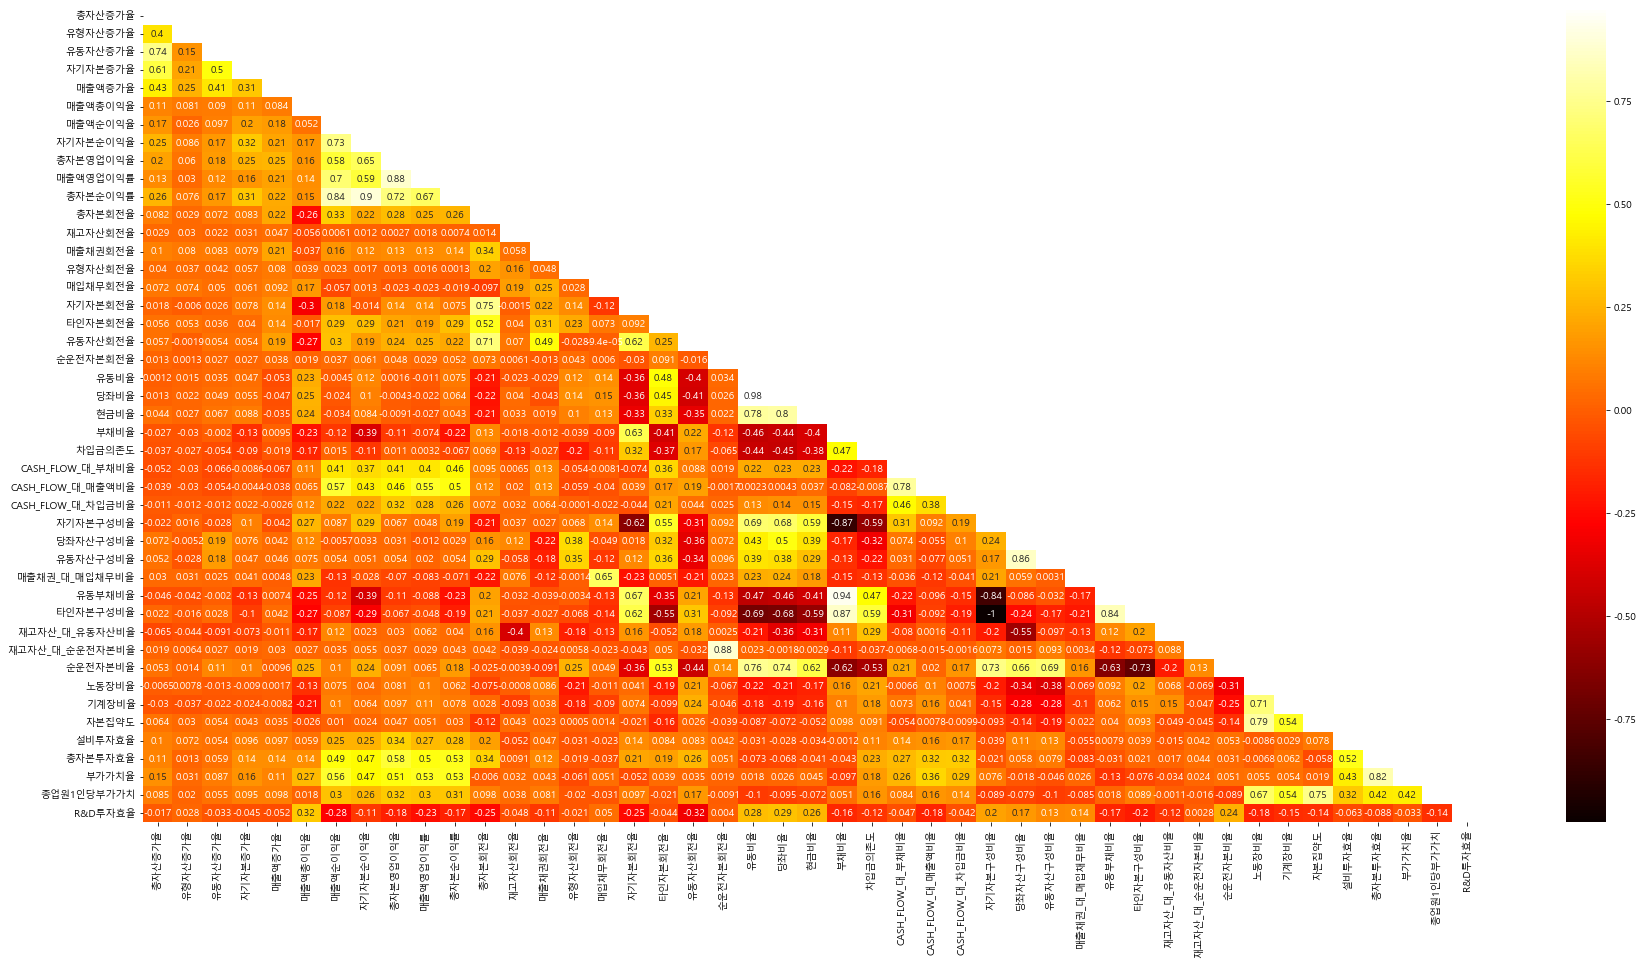

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", family="Malgun Gothic") # 시각화 할때 한글이 볼수 있게 하겠다
plt.rc("axes", unicode_minus=False)
plt.figure(figsize=(30,15))

sns.heatmap(ss_sc3.corr(),annot=True, cmap='hot',mask=mask)

In [56]:
# ss_sc3 = ss_sc3.drop(['매출액영업이익률','총자본순이익률','자기자본회전율','당좌비율','현금비율','자기자본구성비율',
#                       '유동자산구성비율','유동부채비율','타인자본구성비율','재고자산_대_순운전자본비율',
#                       '부가가치율','유형자산증가율','매입채무회전율','CASH_FLOW_대_차입금비율','노동장비율'],axis=1)
ss_sc3 = ss_sc3.drop(['매출액영업이익률','총자본순이익률','당좌비율','현금비율','자기자본구성비율',
                      '유동자산구성비율','유동부채비율','타인자본구성비율','재고자산_대_순운전자본비율','자본집약도',
                      '부가가치율','매입채무회전율','총자본회전율','매출채권_대_매입채무비율','유형자산증가율'],axis=1)

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF_Factor'] = [variance_inflation_factor(ss_sc3,i)for i in range(ss_sc3.shape[1])]
vif['features'] = ss_sc3.columns
# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF_Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF_Factor,features
0,3826.816113,유형자산증가율
1,3807.324552,CASH_FLOW_대_차입금비율
2,9.844100,재고자산회전율
3,8.514822,노동장비율
4,7.989751,순운전자본비율
5,7.795948,CASH_FLOW_대_매출액비율
6,6.327158,당좌자산구성비율
7,5.702329,자기자본회전율
8,5.681667,종업원1인당부가가치
9,5.559459,부채비율


In [32]:
# shap_pct(ss_sc3)

In [58]:
df.iloc[:,49:56]

,매출원가감소율여부,배당금감소율여부,변화율여부,직원감소율여부,자본증가율여부,투자활동감소율여부,기업수명주기
0,1,0,0,0,0,0,1
1,0,0,0,0,0,1,1
2,0,0,0,0,0,0,3
3,0,0,0,0,0,1,1
4,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...
8743,0,0,0,0,0,1,1
8744,0,0,0,0,0,0,3
8745,0,0,0,0,0,0,4
8746,0,1,0,0,0,1,3


In [59]:
q1 = df.iloc[:,49:56]
ss_sc4 = pd.concat([ss_sc3,q1],axis=1)
ss_sc4

,총자산증가율,유형자산증가율,유동자산증가율,자기자본증가율,매출액증가율,매출액총이익율,매출액순이익율,자기자본순이익율,총자본영업이익율,재고자산회전율,...,총자본투자효율,종업원1인당부가가치,R&D투자효율,매출원가감소율여부,배당금감소율여부,변화율여부,직원감소율여부,자본증가율여부,투자활동감소율여부,기업수명주기
0,-0.087743,-0.010695,0.037578,-0.066383,0.014723,0.954289,0.013792,0.022393,0.230961,-0.060345,...,0.070798,-0.088851,-0.052758,1,0,0,0,0,0,1
1,-0.172256,-0.010695,-0.316878,-0.056336,-0.035083,-0.642405,0.042530,0.094346,-0.090203,-0.052225,...,0.335812,-0.012458,-0.048553,0,0,0,0,0,1,1
2,-0.249764,-0.010695,-0.295501,-0.151601,-0.032043,0.816149,0.014193,-0.072493,-0.092936,-0.060980,...,-0.658850,-0.095852,-0.053946,0,0,0,0,0,0,3
3,0.289629,-0.010694,0.145760,-0.119933,-0.022359,-0.761140,0.026155,-0.070179,-0.486533,-0.060391,...,-0.352535,-0.083507,-0.053946,0,0,0,0,0,1,1
4,0.446001,-0.010689,-0.009918,0.068103,0.019849,-0.193797,0.050298,0.135267,0.371726,-0.059768,...,0.241738,-0.065010,-0.053946,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8743,0.068290,-0.010692,0.014218,0.018796,0.006121,0.043212,0.084251,0.338819,1.374850,-0.061125,...,0.717845,-0.047143,-0.025245,0,0,0,0,0,1,1
8744,-0.092940,-0.010695,-0.085258,-0.000815,-0.013939,-0.642405,0.040488,0.028704,0.250094,-0.059940,...,0.297379,-0.060533,-0.053946,0,0,0,0,0,0,3
8745,-0.175985,-0.010695,0.402465,-0.030957,-0.029917,-0.592046,0.051648,0.161460,-0.263768,-0.058701,...,-0.004920,-0.058898,-0.052301,0,0,0,0,0,0,4
8746,-0.058479,-0.010695,-0.074741,-0.075389,-0.040737,-0.504265,0.005915,0.073623,-0.161269,-0.058747,...,-0.351961,-0.060667,-0.053946,0,1,0,0,0,1,3


In [73]:
import statsmodels.formula.api as smf
from tensorboard import summary
formula = '자본증가율여부 ~ C(매출원가감소율여부)'
log_reg = smf.logit(formula, data= df).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.020132
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                자본증가율여부   No. Observations:                 8748
Model:                          Logit   Df Residuals:                     8746
Method:                           MLE   Df Model:                            1
Date:                Fri, 07 Oct 2022   Pseudo R-squ.:                0.006378
Time:                        12:33:03   Log-Likelihood:                -176.11
converged:                       True   LL-Null:                       -177.24
Covariance Type:            nonrobust   LLR p-value:                    0.1327
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -5.8494      0.200    -29.205      0.000      -6.242      -5.457
C(매출원가감소율여부)[T.1]     2.0208      1.030      1.961      0.050       0.001       4.040
=====================================================================================
"""

In [36]:
formula = '회생기업2 ~ C(직원감소율여부)'
log_reg = smf.logit(formula, data= df).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.487011
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  회생기업2   No. Observations:                 8748
Model:                          Logit   Df Residuals:                     8746
Method:                           MLE   Df Model:                            1
Date:                Fri, 07 Oct 2022   Pseudo R-squ.:               4.169e-05
Time:                        09:15:49   Log-Likelihood:                -4260.4
converged:                       True   LL-Null:                       -4260.5
Covariance Type:            nonrobust   LLR p-value:                    0.5512
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.4512      0.028    -51.076      0.000      -1.507      -1.395
C(직원감소율여부)[T.1]     0.0595      0.099      0.599      0.549      -0.135       0.254
===================================================================================
"""

In [37]:
formula = '회생기업2 ~ C(투자활동감소율여부)'
log_reg = smf.logit(formula, data= df).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.485981
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  회생기업2   No. Observations:                 8748
Model:                          Logit   Df Residuals:                     8746
Method:                           MLE   Df Model:                            1
Date:                Fri, 07 Oct 2022   Pseudo R-squ.:                0.002156
Time:                        09:15:50   Log-Likelihood:                -4251.4
converged:                       True   LL-Null:                       -4260.5
Covariance Type:            nonrobust   LLR p-value:                 1.816e-05
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.5156      0.032    -47.262      0.000      -1.578      -1.453
C(투자활동감소율여부)[T.1]     0.2638      0.061      4.335      0.000       0.145       0.383
=====================================================================================
"""

In [38]:
import statsmodels.formula.api as smf
from tensorboard import summary
formula = '회생기업2 ~ C(배당금감소율여부)'
log_reg = smf.logit(formula, data= df).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.483508
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  회생기업2   No. Observations:                 8748
Model:                          Logit   Df Residuals:                     8746
Method:                           MLE   Df Model:                            1
Date:                Fri, 07 Oct 2022   Pseudo R-squ.:                0.007234
Time:                        09:15:50   Log-Likelihood:                -4229.7
converged:                       True   LL-Null:                       -4260.5
Covariance Type:            nonrobust   LLR p-value:                 4.117e-15
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.3710      0.028    -48.125      0.000      -1.427      -1.315
C(배당금감소율여부)[T.1]    -0.7278      0.100     -7.273      0.000      -0.924      -0.532
====================================================================================
"""

In [39]:
import statsmodels.formula.api as smf
from tensorboard import summary
formula = '회생기업2 ~ C(자본증가율여부)'
log_reg = smf.logit(formula, data= df).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.486728
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  회생기업2   No. Observations:                 8748
Model:                          Logit   Df Residuals:                     8746
Method:                           MLE   Df Model:                            1
Date:                Fri, 07 Oct 2022   Pseudo R-squ.:               0.0006212
Time:                        09:15:50   Log-Likelihood:                -4257.9
converged:                       True   LL-Null:                       -4260.5
Covariance Type:            nonrobust   LLR p-value:                   0.02140
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.4501      0.027    -53.128      0.000      -1.504      -1.397
C(자본증가율여부)[T.1]     0.9801      0.404      2.426      0.015       0.188       1.772
===================================================================================
"""

In [40]:
import statsmodels.formula.api as smf
from tensorboard import summary
formula = '회생기업2 ~ C(변화율여부)'
log_reg = smf.logit(formula, data= df).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.486971
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  회생기업2   No. Observations:                 8748
Model:                          Logit   Df Residuals:                     8746
Method:                           MLE   Df Model:                            1
Date:                Fri, 07 Oct 2022   Pseudo R-squ.:               0.0001222
Time:                        09:15:51   Log-Likelihood:                -4260.0
converged:                       True   LL-Null:                       -4260.5
Covariance Type:            nonrobust   LLR p-value:                    0.3076
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.4431      0.027    -52.674      0.000      -1.497      -1.389
C(변화율여부)[T.1]    -0.2433      0.245     -0.993      0.321      -0.723       0.237
=================================================================================
"""

### 회귀분석

In [60]:
# 필요한 라이브러리
import statsmodels.api as sm

# target은 종속변수, feature는 독립변수와 같다.
target = y
feature = ss_sc4

# 상수항을 더해줘서 회귀식을 더 잘 적합할 수 있도록 만들어 준다.
feature_add = sm.add_constant(feature, has_constant='add')

# sm OLS 적합
model = sm.OLS(target, feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  회생기업2   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     34.12
Date:                Fri, 07 Oct 2022   Prob (F-statistic):          2.04e-229
Time:                        10:50:30   Log-Likelihood:                -3630.0
No. Observations:                8748   AIC:                             7338.
Df Residuals:                    8709   BIC:                             7614.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -65.3495     27.868     -2.345      0.019    -119.978     -10.721
총자산증가율                0.0045      0.028      0.159      0.874      -0.051       0.060
유형자산증가율           -6140.2815   2605.769     -2.356      0.018   -1.12e+04   -1032.358
유동자산증가율               0.0003      0.021      0.014      0.988      -0.041       0.041
자기자본증가율               0.0703      0.047      1.495      0.135      -0.022       0.163
매출액증가율               -0.8565      0.212     -4.041      0.000      -1.272      -0.441
매출액총이익율               0.0115      0.005      2.123      0.034       0.001       0.022
매출액순이익율              -0.3068      0.084     -3.634      0.000      -0.472      -0.141
자기자본순이익율              0.2472      0.031      8.094      0.000       0.187       0.307
총자본영업이익율              0.0922      0.008     11.961      0.000       0.077       0.107
재고자산회전율               0.1756      0.215      0.817      0.414      -0.246       0.597
매출채권회전율              -0.0055      0.023     -0.242      0.809      -0.050       0.039
유형자산회전율               0.1457      0.027      5.353      0.000       0.092       0.199
자기자본회전율              -0.0075      0.018     -0.426      0.670      -0.042       0.027
타인자본회전율               0.0041      0.010      0.422      0.673      -0.015       0.023
유동자산회전율               0.0471      0.010      4.624      0.000       0.027       0.067
순운전자본회전율              0.1885      0.251      0.752      0.452      -0.303       0.680
유동비율                 -0.0761      0.021     -3.654      0.000      -0.117      -0.035
부채비율                  0.2516      0.104      2.418      0.016       0.048       0.456
차입금의존도               -0.0015      0.006     -0.256      0.798      -0.013       0.010
CASH_FLOW_대_부채비율     -0.0010      0.051     -0.019      0.984      -0.102       0.100
CASH_FLOW_대_매출액비율     2.2296      0.597      3.737      0.000       1.060       3.399
CASH_FLOW_대_차입금비율    10.3910     20.878      0.498      0.619     -30.536      51.318
당좌자산구성비율             -0.0081      0.010     -0.792      0.428      -0.028       0.012
재고자산_대_유동자산비율         0.0018      0.007      0.266      0.790      -0.012       0.015
순운전자본비율               0.0322      0.012      2.719      0.007       0.009       0.055
노동장비율                -0.2117      0.144     -1.466      0.143      -0.495       0.071
기계장비율                 0.2482      0.061      4.036      0.000       0.128       0.369
설비투자효율                0.0481      0.026      1.877      0.061      -0.002       0.098
총자본투자효율              -0.0480      0.010     -5.011      0.000      -0.067      -0.029
종업원1인당부가가치            0.4002      0.107      3.748      0.000       0.191       0.610
R&D투자효율               0.1671      0.118      1.410      0.159      -0.065       0.399
매출원가감소율여부             0.0262      0.055      0.476      0.634      -0.082

다행히 다중공선성은 사라졌군...

In [65]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(ss_sc3[['매출액증가율', '매출액총이익율', '매출액순이익율', '자기자본순이익율', '총자본영업이익율', '유형자산회전율',
       '유동자산회전율', '유동비율', '부채비율', 'CASH_FLOW_대_매출액비율', '순운전자본비율', '기계장비율',
       '자본집약도', '설비투자효율', '총자본투자효율', '종업원1인당부가가치']])

,VIF Factor,features
0,7.451482,종업원1인당부가가치
1,7.154092,자본집약도
2,4.199345,자기자본순이익율
3,3.847938,순운전자본비율
4,2.927897,총자본투자효율
5,2.922996,매출액순이익율
6,2.820500,부채비율
7,2.632386,유동비율
8,2.460511,총자본영업이익율
9,2.302718,기계장비율


### 후진제거법

                            OLS Regression Results                            
Dep. Variable:                  회생기업2   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     8.146
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           1.59e-06
Time:                        01:38:00   Log-Likelihood:                 1145.5
No. Observations:                2652   AIC:                            -2281.
Df Residuals:                    2647   BIC:                            -2252.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0256      0.003      8.347      0.0

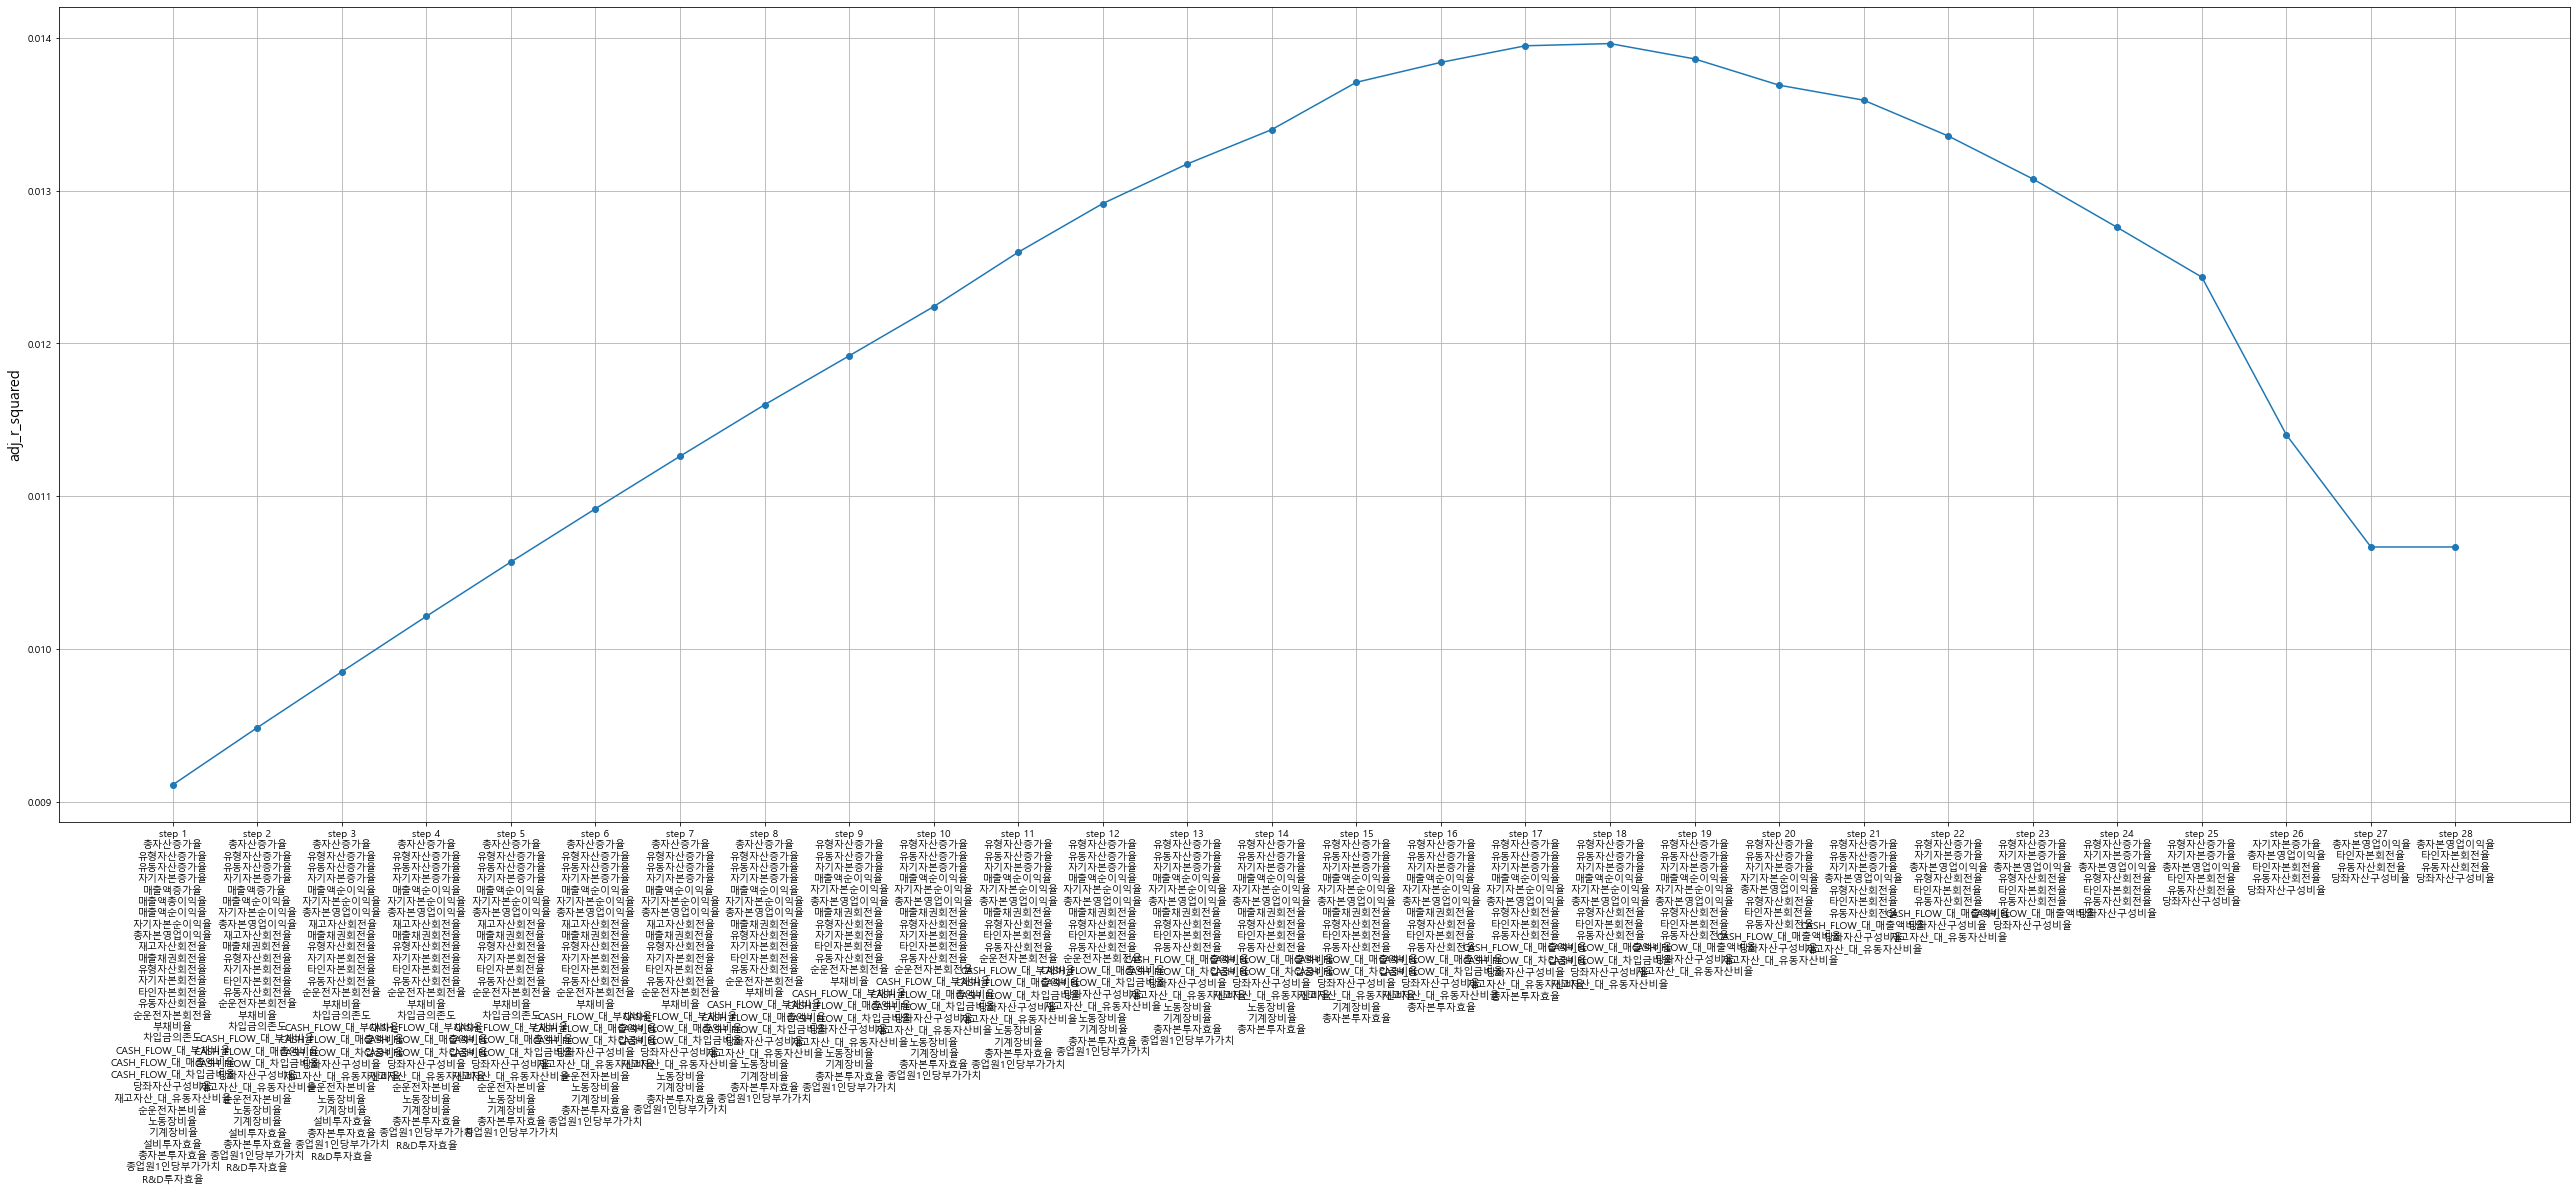

In [535]:
def backward_regression(feature, target,
                           initial_list=[], 
                           threshold_out = 0.05):
    
    import matplotlib.pyplot as plt
    import statsmodels.api as sm
    import pandas as pd
    import warnings
    warnings.filterwarnings("ignore")
    
    feature_list = feature.columns.tolist()  
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adj_r_squared_list = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    included = feature.columns.tolist() 
    
    while True:
        changed=False
        model = sm.OLS(target, sm.add_constant(feature[included])).fit(disp=0)
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:] # 각 feature의 P값을 의미함
        worst_pval = pvalues.max()	# P 값이 가장 높은 것 선정
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
        
        step += 1
        steps.append(step)        
        adj_r_squared = sm.OLS(target, sm.add_constant(feature[included])).fit(disp=0).rsquared_adj
        adj_r_squared_list.append(adj_r_squared)
        sv_per_step.append(included.copy())
        
        if not changed:
            break
    
    # 최종모델 출력
    model = sm.OLS(target, sm.add_constant(feature[included])).fit()
    print(model.summary())
    print(feature[included].columns)

    
    fig = plt.figure(figsize=(45,15))
    plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=10)
    plt.plot(steps, adj_r_squared_list, marker='o')
    plt.ylabel('adj_r_squared',fontsize=15)
    plt.grid(True)
    plt.show()

    return model

backward_model = backward_regression(ss_sc3,y)

In [517]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(ss_sc3[['총자본영업이익율', '타인자본회전율', '유동자산회전율', '당좌자산구성비율']])

,VIF Factor,features
0,1.432702,타인자본회전율
1,1.429435,유동자산회전율
2,1.419719,당좌자산구성비율
3,1.082033,총자본영업이익율


### 릿지

In [518]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit 
from scipy import stats
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
%matplotlib inline

ridge = Ridge(alpha = 100)
neg_mse_scores = cross_val_score(ridge, ss_sc3, y, scoring="neg_mean_squared_error", cv = TimeSeriesSplit(n_splits=6))
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-0.    -0.    -0.    -0.042 -0.073 -0.06 ]
 5 folds 의 개별 RMSE scores :  [0.    0.    0.    0.206 0.27  0.246]
 5 folds 의 평균 RMSE : 0.120 


In [519]:
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV, LogisticRegressionCV
# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = TimeSeriesSplit(n_splits=6))
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
       
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff

    return coeff_df

# 릿지에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
ridge_alpha = [0,1,2,3,4,5]
coeff_lasso_df =get_linear_reg_eval('Ridge', params=ridge_alpha, X_data_n=ss_sc3, y_target_n=y)

# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(ridge_alpha[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

#######  Ridge #######
alpha 0일 때 5 폴드 세트의 평균 RMSE: 0.120 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 0.120 
alpha 2일 때 5 폴드 세트의 평균 RMSE: 0.120 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 0.120 
alpha 4일 때 5 폴드 세트의 평균 RMSE: 0.120 
alpha 5일 때 5 폴드 세트의 평균 RMSE: 0.120 


,alpha:0,alpha:1,alpha:2,alpha:3,alpha:4,alpha:5
노동장비율,0.094158,0.046145,0.029671,0.021281,0.016211,0.012828
자기자본순이익율,0.058123,0.053883,0.049464,0.045892,0.042979,0.040557
재고자산회전율,0.051650,0.024000,0.015508,0.011461,0.009110,0.007579
유형자산회전율,0.050734,0.047273,0.045171,0.043416,0.041847,0.040411
자기자본증가율,0.046861,0.046195,0.045345,0.044499,0.043676,0.042879
CASH_FLOW_대_매출액비율,0.036138,0.032634,0.030644,0.029154,0.027947,0.026927
부채비율,0.023655,0.018921,0.014156,0.010541,0.007810,0.005714
유동자산회전율,0.020142,0.020258,0.020137,0.020004,0.019878,0.019762
당좌자산구성비율,0.013267,0.012741,0.012479,0.012309,0.012180,0.012074
재고자산_대_유동자산비율,0.008661,0.008007,0.007704,0.007505,0.007352,0.007227


진짜 릿지는 못 써먹겠다....ㅂㄷㅂㄷ

### 라쏘
- 주요 파라미터 alpha = 라쏘 회귀의 alpha L1 규제 계수
- L1규제는 불필요한 회귀 계수를 급격하게 감소시켜 0으로 만들고 제거.

In [520]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.model_selection import TimeSeriesSplit 
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
%matplotlib inline

lasso = Lasso(alpha = 100)
neg_mse_scores = cross_val_score(lasso, ss_sc3, y, scoring="neg_mean_squared_error", cv = TimeSeriesSplit(n_splits=6))
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-0.    -0.    -0.    -0.042 -0.073 -0.061]
 5 folds 의 개별 RMSE scores :  [0.    0.    0.    0.206 0.27  0.248]
 5 folds 의 평균 RMSE : 0.121 


In [522]:
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV, LogisticRegressionCV
# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
       
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff

    return coeff_df

# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [0.0003,0.0005,0.0006,0.0007,0.0008]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=ss_sc3, y_target_n=y)

# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

#######  Lasso #######
alpha 0.0003일 때 5 폴드 세트의 평균 RMSE: 0.123 
alpha 0.0005일 때 5 폴드 세트의 평균 RMSE: 0.123 
alpha 0.0006일 때 5 폴드 세트의 평균 RMSE: 0.123 
alpha 0.0007일 때 5 폴드 세트의 평균 RMSE: 0.123 
alpha 0.0008일 때 5 폴드 세트의 평균 RMSE: 0.122 


,alpha:0.0003,alpha:0.0005,alpha:0.0006,alpha:0.0007,alpha:0.0008
자기자본증가율,0.027701,0.016950,0.013875,0.010661,0.007446
유형자산회전율,0.017876,0.000000,0.000000,0.000000,0.000000
유동자산회전율,0.016947,0.015831,0.015276,0.014739,0.014203
자기자본순이익율,0.014414,0.003921,0.000000,0.000000,0.000000
CASH_FLOW_대_매출액비율,0.012004,0.008331,0.006374,0.003929,0.001484
당좌자산구성비율,0.008670,0.008566,0.008062,0.007587,0.007113
총자본영업이익율,0.006878,0.008222,0.008932,0.009354,0.009775
재고자산_대_유동자산비율,0.004482,0.003793,0.003405,0.002984,0.002564
총자본투자효율,0.003374,0.003267,0.003256,0.003191,0.003126
CASH_FLOW_대_부채비율,-0.000000,0.000000,0.000000,0.000000,0.000000


일단 0.007로 선택 했습니다

In [523]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(ss_sc3[['자기자본증가율','유형자산회전율','유동자산회전율','자기자본순이익율','CASH_FLOW_대_매출액비율','당좌자산구성비율',
         '총자본영업이익율','재고자산_대_유동자산비율','총자본투자효율','유동자산증가율','순운전자본비율','기계장비율','매출채권회전율',
         '타인자본회전율','총자산증가율']])

,VIF Factor,features
0,3.768454,순운전자본비율
1,3.255197,당좌자산구성비율
2,3.093478,총자산증가율
3,2.763705,타인자본회전율
4,2.671852,유동자산증가율
5,2.620647,유동자산회전율
6,2.330312,총자본영업이익율
7,2.098621,자기자본순이익율
8,1.958551,자기자본증가율
9,1.681589,매출채권회전율


In [73]:
# e = df[['회사명','거래소코드','회계년도']]
# e2 = pd.concat([e,ss_sc3],axis=1)
# r = df[['매출원가감소율여부','배당금감소율여부','변화율여부','직원감소율여부','자본증가율여부','투자활동감소율여부']]
# r2 = pd.concat([e2,r],axis=1)
# r2 = r2[['회사명','거래소코드','회계년도','유동자산회전율','총자본투자효율','재고자산_대_유동자산비율',
#          '당좌자산구성비율','차입금의존도','총자본영업이익율','자기자본순이익율',
#          '매출원가감소율여부','배당금감소율여부','변화율여부','직원감소율여부','자본증가율여부','투자활동감소율여부']]
# r2.to_csv('스탠다드라쏘데이터.csv',encoding='cp949',index=False)
# r2

12개 선정입니다

### 엘라스틱넷
- L2규제와 L1규제를 결합한 회귀. 비용함수의 목표는 함수식을 최소화 하는 회귀계수(W)를 찾는 것.
- 엘라스틱넷은 라쏘회귀의 성향이 강해 L2규제를 추가한 것. 상대적으로 시간이 오래 걸린다.
- 주요 파라미터 : -alpha(aL1+bL2=L1의 alpha + L2의 alpha) -l1_ratio (a/a+b)

In [525]:
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV, LogisticRegressionCV
# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = TimeSeriesSplit(n_splits=6))
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
       
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff

    return coeff_df

# 엘라스틱에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
elastic_alpha = [0.0003,0.0004,0.0005,0.0007,0.0009]
coeff_lasso_df =get_linear_reg_eval('ElasticNet', params=elastic_alpha, X_data_n=ss_sc3, y_target_n=y)

# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(elastic_alpha[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

#######  ElasticNet #######
alpha 0.0003일 때 5 폴드 세트의 평균 RMSE: 0.120 
alpha 0.0004일 때 5 폴드 세트의 평균 RMSE: 0.120 
alpha 0.0005일 때 5 폴드 세트의 평균 RMSE: 0.120 
alpha 0.0007일 때 5 폴드 세트의 평균 RMSE: 0.120 
alpha 0.0009일 때 5 폴드 세트의 평균 RMSE: 0.120 


,alpha:0.0003,alpha:0.0004,alpha:0.0005,alpha:0.0007,alpha:0.0009
자기자본증가율,0.032565,0.028640,0.024815,0.017347,0.012803
유형자산회전율,0.026476,0.019598,0.012719,0.000000,0.000000
자기자본순이익율,0.019945,0.015571,0.011522,0.004426,0.000000
유동자산회전율,0.017244,0.017013,0.016672,0.015880,0.015102
CASH_FLOW_대_매출액비율,0.013794,0.012376,0.010945,0.008441,0.005601
당좌자산구성비율,0.008948,0.008738,0.008655,0.008606,0.007909
총자본영업이익율,0.006272,0.006756,0.007226,0.008163,0.009067
재고자산_대_유동자산비율,0.004922,0.004578,0.004276,0.003821,0.003272
총자본투자효율,0.003364,0.003371,0.003358,0.003267,0.003239
CASH_FLOW_대_부채비율,-0.000000,-0.000000,0.000000,0.000000,0.000000


일단 여기도 0.0005로 선정 합니다

In [526]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(ss_sc3[['자기자본증가율','유형자산회전율','자기자본순이익율','유동자산회전율',
         'CASH_FLOW_대_매출액비율','당좌자산구성비율','총자본영업이익율','재고자산_대_유동자산비율','총자본투자효율','순운전자본비율'
         ,'유동자산증가율','매출채권회전율','기계장비율','타인자본회전율','총자산증가율','총자본투자효율','유동비율']])

,VIF Factor,features
0,3.768454,순운전자본비율
1,3.255197,당좌자산구성비율
2,3.093478,총자산증가율
3,2.763705,타인자본회전율
4,2.671852,유동자산증가율
5,2.620647,유동자산회전율
6,2.330312,총자본영업이익율
7,2.098621,자기자본순이익율
8,1.958551,자기자본증가율
9,1.681589,매출채권회전율


### 교차검증 전 정확도 확인

13개 선정입니다

3개 공통을 추출한 결과 자기자본순이익율,CASH_FLOW_대_매출액비율 이렇게 2개 나왔네용;; 좀 더 늘리고 봐야되나...

In [76]:
# from numpy import arange

# from pandas import read_csv

# from sklearn.linear_model import LassoCV,RidgeCV

# from sklearn.model_selection import RepeatedKFold

# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# # define model

# model = RidgeCV(alphas=arange(0, 1, 0.001), cv=cv, n_jobs=1)

# # fit model

# model.fit(ss_sc4, y)

# # summarize chosen configuration

# print('alpha: %f' % model.alpha_)

In [546]:
ss_sc3 = ss_sc3[['총자본영업이익율','자기자본순이익율','유동자산회전율','총자본투자효율','매출채권회전율','총자본회전율',
         '유형자산회전율','매출액총이익율','순운전자본비율','재고자산_대_유동자산비율','총자산증가율','유동비율']]

In [547]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(ss_sc3[['총자본영업이익율','자기자본순이익율','유동자산회전율','총자본투자효율','매출채권회전율','총자본회전율',
         '유형자산회전율','매출액총이익율','순운전자본비율','재고자산_대_유동자산비율','총자산증가율','유동비율']])

,VIF Factor,features
0,4.102676,유동자산회전율
1,3.741116,순운전자본비율
2,3.278220,총자본회전율
3,2.653980,유동비율
4,2.119659,총자본영업이익율
5,1.979091,자기자본순이익율
6,1.678107,총자본투자효율
7,1.445028,매출채권회전율
8,1.265407,매출액총이익율
9,1.211150,유형자산회전율


In [550]:
from scipy.stats.mstats import winsorize
ss_sc3 = ss_sc3.copy()
for col in ss_sc3.columns:
     ss_sc3[col] = winsorize(ss_sc3[col], limits= 0.025)

In [551]:
shap_pct(ss_sc3)

총자본영업이익율 의 pvalue: 0.0
자기자본순이익율 의 pvalue: 0.0
유동자산회전율 의 pvalue: 0.0
총자본투자효율 의 pvalue: 8.995635491733163e-41
매출채권회전율 의 pvalue: 0.0
총자본회전율 의 pvalue: 0.0
유형자산회전율 의 pvalue: 0.0
매출액총이익율 의 pvalue: 0.0
순운전자본비율 의 pvalue: 2.5610871955715633e-29
재고자산_대_유동자산비율 의 pvalue: 8.407790785948902e-45
총자산증가율 의 pvalue: 0.0
유동비율 의 pvalue: 0.0


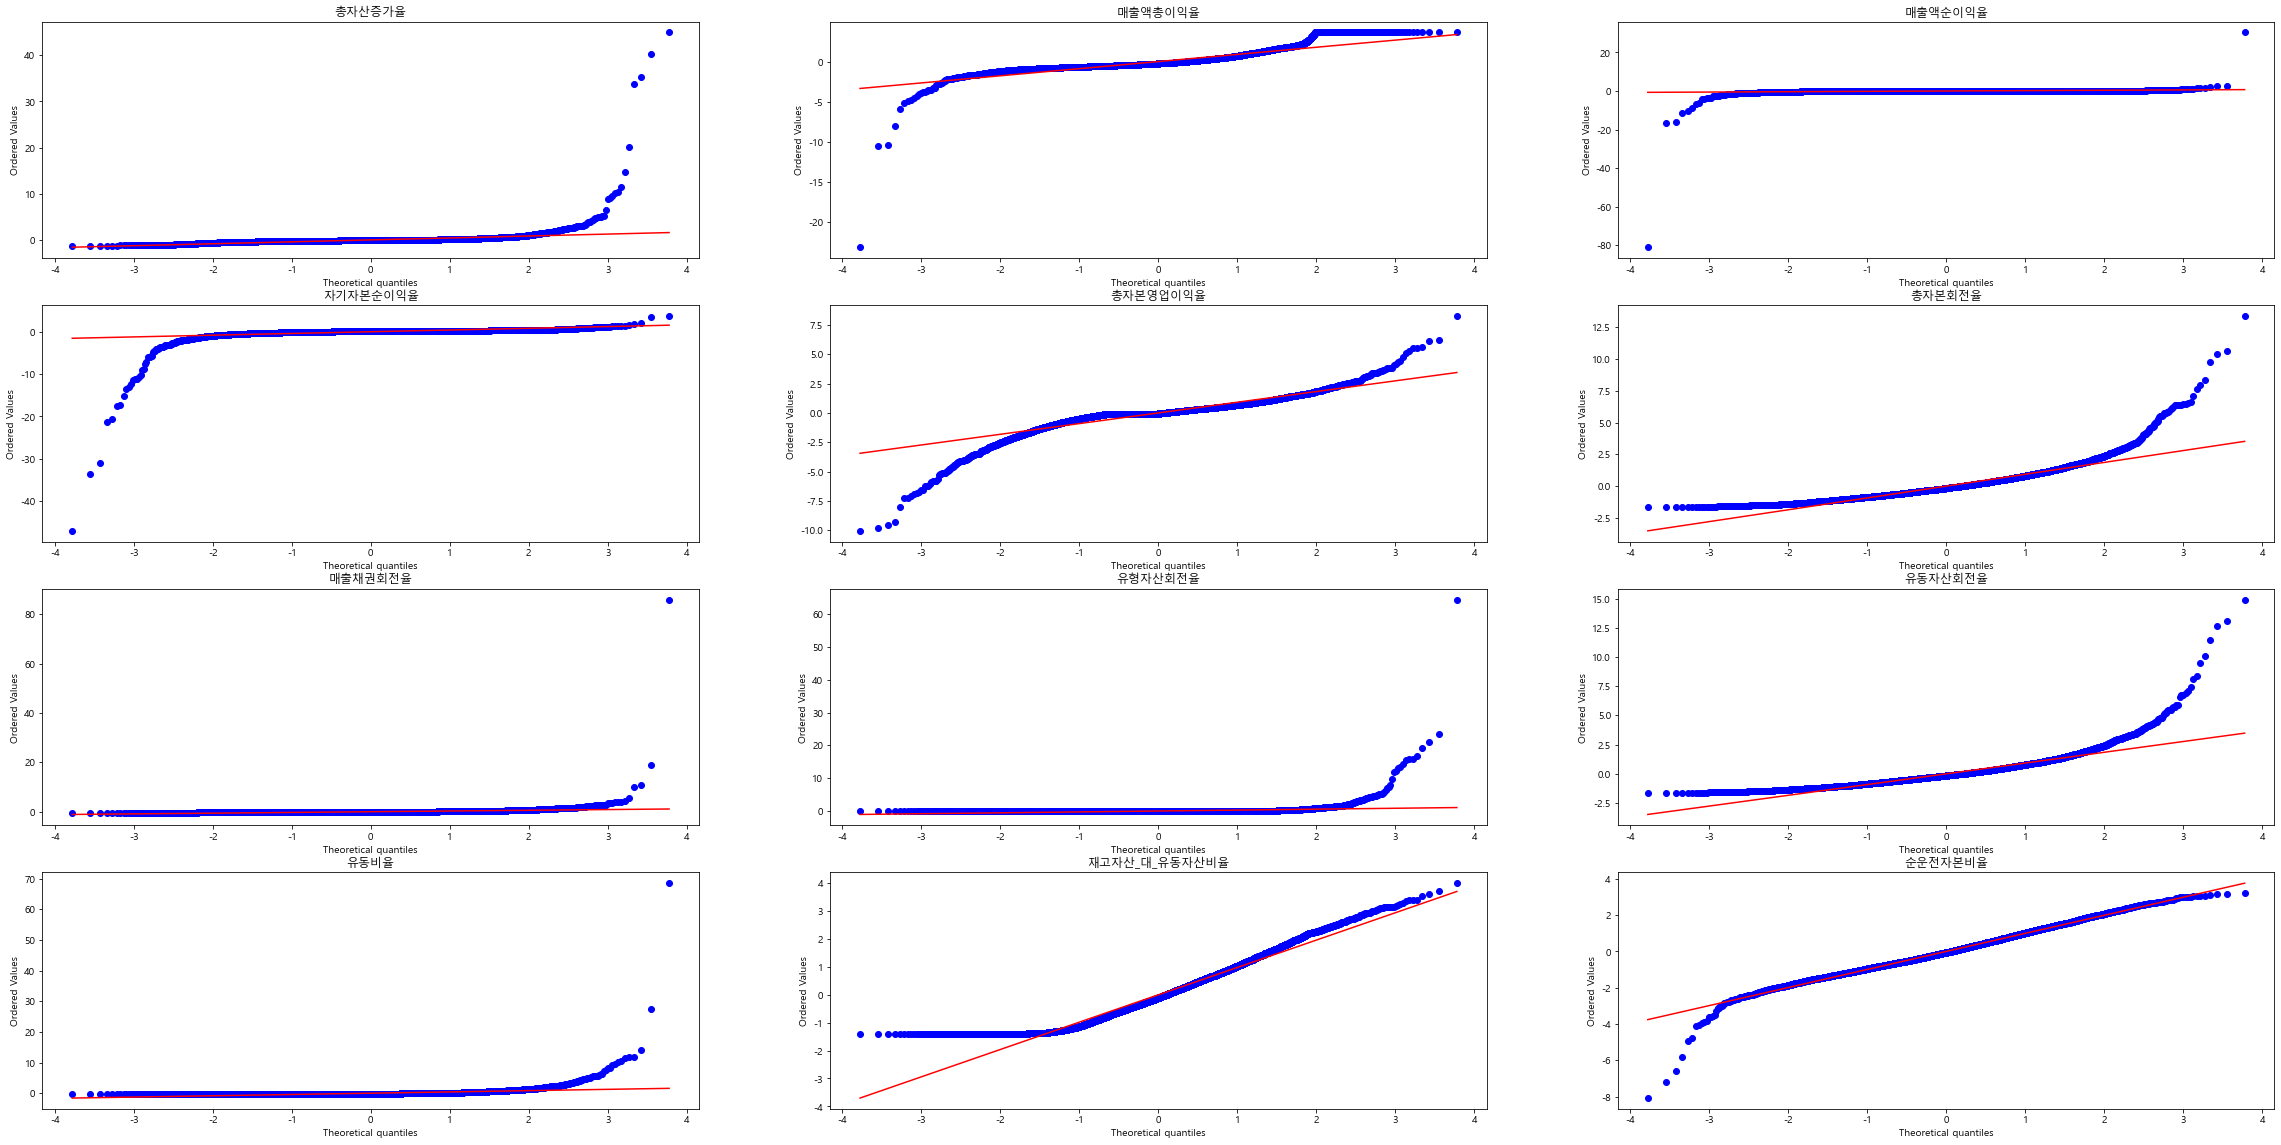

In [553]:
# 정규성 qqplot
# 표준정규분포에서 직선에 가까우면 오차의 정규성 만족
from matplotlib.pyplot import imread
import scipy.stats as stats

fig, axes = plt.subplots(4,3)
fig.set_size_inches((40,20))


stats.probplot(ss_sc2['총자산증가율'],dist=stats.norm,plot=axes[0,0])
axes[0,0].title.set_text("총자산증가율")
stats.probplot(ss_sc2['매출액총이익율'],dist=stats.norm,plot=axes[0,1])
axes[0,1].title.set_text("매출액총이익율")
stats.probplot(ss_sc2['매출액순이익율'],dist=stats.norm,plot=axes[0,2])
axes[0,2].title.set_text("매출액순이익율")
stats.probplot(ss_sc2['자기자본순이익율'],dist=stats.norm,plot=axes[1,0])
axes[1,0].title.set_text("자기자본순이익율")
stats.probplot(ss_sc2['총자본영업이익율'],dist=stats.norm,plot=axes[1,1])
axes[1,1].title.set_text("총자본영업이익율")
stats.probplot(ss_sc2['총자본회전율'],dist=stats.norm,plot=axes[1,2])
axes[1,2].title.set_text("총자본회전율")
stats.probplot(ss_sc2['매출채권회전율'],dist=stats.norm,plot=axes[2,0])
axes[2,0].title.set_text("매출채권회전율")
stats.probplot(ss_sc2['유형자산회전율'],dist=stats.norm,plot=axes[2,1])
axes[2,1].title.set_text("유형자산회전율")
stats.probplot(ss_sc2['유동자산회전율'],dist=stats.norm,plot=axes[2,2])
axes[2,2].title.set_text("유동자산회전율")
stats.probplot(ss_sc2['유동비율'],dist=stats.norm,plot=axes[3,0])
axes[3,0].title.set_text("유동비율")
stats.probplot(ss_sc2['재고자산_대_유동자산비율'],dist=stats.norm,plot=axes[3,1])
axes[3,1].title.set_text("재고자산_대_유동자산비율")
stats.probplot(ss_sc2['순운전자본비율'],dist=stats.norm,plot=axes[3,2])
axes[3,2].title.set_text("순운전자본비율")

plt.show()